<a href="https://www.kaggle.com/code/burcakaydn/us-citizens-by-income-levels-eda-project?scriptVersionId=118509952" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:#47B699; font-family:Arial; color:white; font-size:200%; text-align:center; border-radius:10px 10px;">Analysis of US Citizens by Income Levels</p>

<a id="toc"></a>

## <p style="background-color:#47B699; font-family:Georgia; color:#FFFFFF; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [Introduction](#0)
* [Dataset Info](#1)
* [Importing Related Libraries](#2)
* [Recognizing & Understanding Data](#3)
* [Univariate & Multivariate Analysis](#4)    
* [Other Specific Analysis Questions](#5)
* [Dropping Similar & Unneccessary Features](#6)
* [Handling with Missing Values](#7)
* [Handling with Outliers](#8)    
* [Final Step to make ready dataset for ML Models](#9)
* [The End of the Project](#10)

## <p style="background-color:#47B699; font-family:Georgia; color:white; font-size:175%; text-align:center; border-radius:10px 10px;">Introduction</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47B699" data-toggle="popover">Content</a>

One of the most important components to any data science experiment that doesn’t get as much importance as it should is **``Exploratory Data Analysis (EDA)``**. In short, EDA is **``"A first look at the data"``**. It is a critical step in analyzing the data from an experiment. It is used to understand and summarize the content of the dataset to ensure that the features which we feed to our machine learning algorithms are refined and we get valid, correctly interpreted results.
In general, looking at a column of numbers or a whole spreadsheet and determining the important characteristics of the data can be very tedious and boring. Moreover, it is good practice to understand the problem statement and the data before you get your hands dirty, which in view, helps to gain a lot of insights. I will try to explain the concept using the Adult dataset/Census Income dataset available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult). The problem statement here is to predict whether the income exceeds 50k a year or not based on the census data.

# Aim of the Project

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;
1. Analyzing the characteristics of individuals according to income groups
2. Preparing data to create a model that will predict the income levels of people according to their characteristics (So the "salary" feature is the target feature)

## <p style="background-color:#47B699; font-family:newtimeroman; color:white; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47B699" data-toggle="popover">Content</a>

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

## <p style="background-color:#47B699; font-family:newtimeroman; color:white; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Related Libraries</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47B699" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

### <p style="background-color:#47AC34; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Reading the data from file</p>

In [2]:
df = pd.read_csv("/kaggle/input/eda-project-analyze-us-citizens/adult_eda.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


## <p style="background-color:#47B699; font-family:Georgia; color:white; font-size:150%; text-align:center; border-radius:10px 10px;">Recognizing and Understanding Data</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47B699" data-toggle="popover">Content</a>

### 1. Try to understand what the data looks like
- Check the head, shape, data-types of the features.
- Check if there are some dublicate rows or not. If there are, then drop them. 
- Check the statistical values of features.
- If needed, rename the columns' names for easy use. 
- Basically check the missing values.

In [3]:
# Check first columns of dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [6]:
# Check if the Dataset have any Duplicate
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [7]:
# Drop Duplicates
df.drop_duplicates(inplace = True)

In [8]:
# Check the shape of the Dataset
df.shape

(32537, 15)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.000,38.586,13.638,17.000,28.000,37.000,48.000,90.000
fnlwgt,32537.000,189780.849,105556.471,12285.000,117827.000,178356.000,236993.000,1484705.000
education-num,31735.000,10.084,2.575,1.000,9.000,10.000,12.000,16.000
capital-gain,32537.000,1078.444,7387.957,0.000,0.000,0.000,0.000,99999.000
capital-loss,32537.000,87.368,403.102,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32537.000,40.440,12.347,1.000,40.000,40.000,45.000,99.000


**Rename the features of;**<br>
**``"education-num"``**, **``"marital-status"``**, **``"capital-gain"``**, **``"capital-loss"``**, **``"hours-per-week"``**, **``"native-country"``** **as**<br>
**``"education_num"``**, **``"marital_status"``**, **``"capital_gain"``**, **``"capital_loss"``**, **``"hours_per_week"``**, **``"native_country"``**, **respectively and permanently.**

In [10]:
df.rename(columns = {"education-num": "education_num", "marital-status" : "marital_status", "capital-gain" : "capital_gain",
                     "capital-loss": "capital_loss", "hours-per-week": "hours_per_week", "native-country": "native_country" },
         inplace = True)

In [11]:
# Check the sum of Missing Values per column

df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [12]:
# Check the Percentage of Missing Values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

age               0.000
workclass         0.000
fnlwgt            0.000
education         0.000
education_num     2.465
marital_status    0.000
occupation        0.000
relationship     15.564
race              0.000
sex               0.000
capital_gain      0.000
capital_loss      0.000
hours_per_week    0.000
native_country    0.000
salary            0.000
dtype: float64

### 2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [14]:
df.describe(include = "object").T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital_status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,27473,5,Husband,13187
race,32537,5,White,27795
sex,32537,2,Male,21775
native_country,32537,42,United-States,29153
salary,32537,2,<=50K,24698


**Assign the Columns (Features) of object data type as** **``"object_col"``**

In [15]:
object_col = df.select_dtypes(include = "object")

object_col.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary'],
      dtype='object')

In [16]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

workclass
----------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
----------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
----------------------------------------
marital_status
----------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418


**Check if the Dataset has any Question Mark** **``"?"``**

In [17]:
df.isin(["?"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool

## <p style="background-color:#47B699; font-family:georgia; color:white; font-size:175%; text-align:center; border-radius:10px 10px;">Univariate & Multivariate Analysis</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47B699" data-toggle="popover">Content</a>

Examine all features (first target feature("salary"), then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.

**to do list for numeric features:**
1. Check the boxplot to see extreme values 
2. Check the histplot/kdeplot to see distribution of feature
3. Check the statistical values
4. Check the boxplot and histplot/kdeplot by "salary" levels
5. Check the statistical values by "salary" levels
6. Write down the conclusions you draw from your analysis

**to do list for categoric features:**
1. Find the features which contains similar values, examine the similarities and analyze them together 
2. Check the count/percentage of person in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count of person in each "salary" levels by categories and visualize it with a suitable plot
5. Check the percentage distribution of person in each "salary" levels by categories and visualize it with suitable plot
6. Check the count of person in each categories by "salary" levels and visualize it with a suitable plot
7. Check the percentage distribution of person in each categories by "salary" levels and visualize it with suitable plot
8. Write down the conclusions you draw from your analysis

**Note :** Instruction/direction for each feature is available under the corresponding feature in detail, as well.

## Salary (Target Feature)

**Check the count of person in each "salary" levels and visualize it with a countplot**

In [18]:
df["salary"].value_counts()

<=50K    24698
>50K      7839
Name: salary, dtype: int64

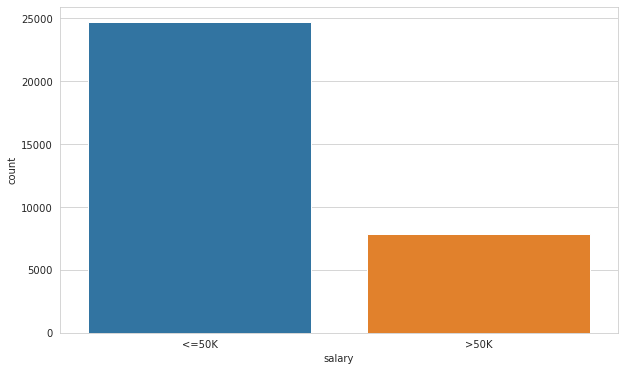

In [19]:
sns.countplot(data = df, x = "salary");

**Check the percentage of person in each "salary" levels and visualize it with a pieplot**

In [20]:
percentage_salary = df["salary"].value_counts() / len(df)

percentage_salary

<=50K   0.759
>50K    0.241
Name: salary, dtype: float64

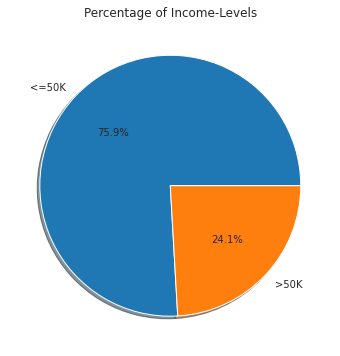

In [21]:
plt.pie(percentage_salary, labels = ["<=50K", ">50K"],  autopct="%.1f%%", shadow = True)

plt.title("Percentage of Income-Levels");


**Result :** %75.9 of people work for low income, %24.1 of people work for high income

## Numeric Features

## age

**Check the boxplot to see extreme values**

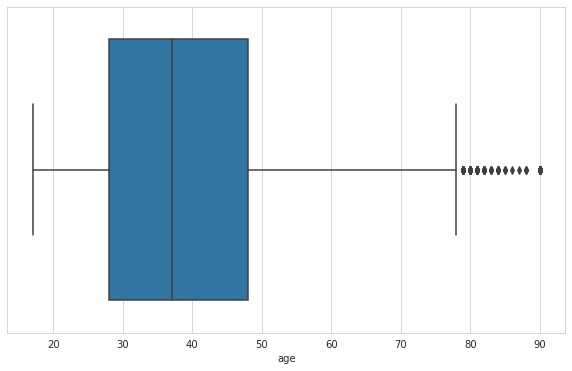

In [22]:
sns.boxplot(data = df, x = "age");

**Check the histplot/kdeplot to see distribution of feature**

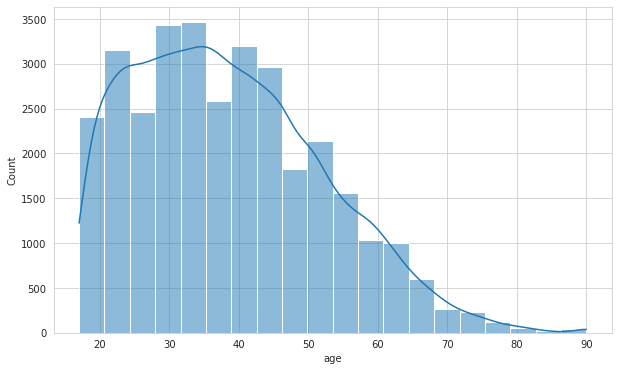

In [23]:
sns.histplot(data = df, x = "age", kde = True, bins = 20);

**Check the statistical values**

In [24]:
df.age.describe()

count   32537.000
mean       38.586
std        13.638
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

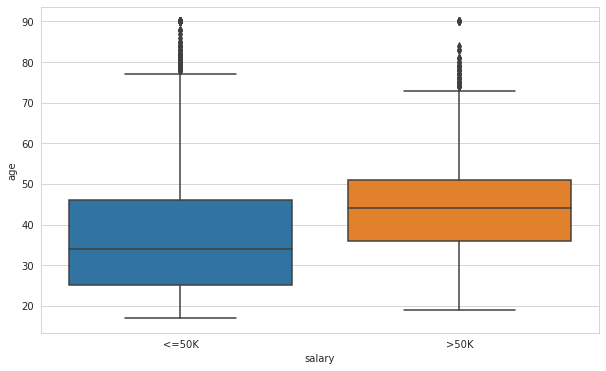

In [25]:
sns.boxplot(data = df, x = "salary", y = "age");

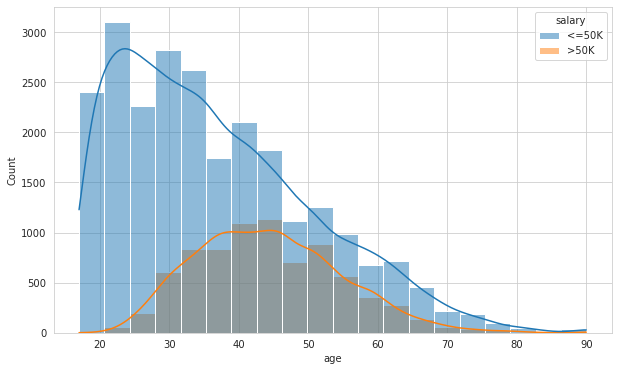

In [26]:
sns.histplot(data = df, x = "age", hue = "salary", bins = 20, kde = True);

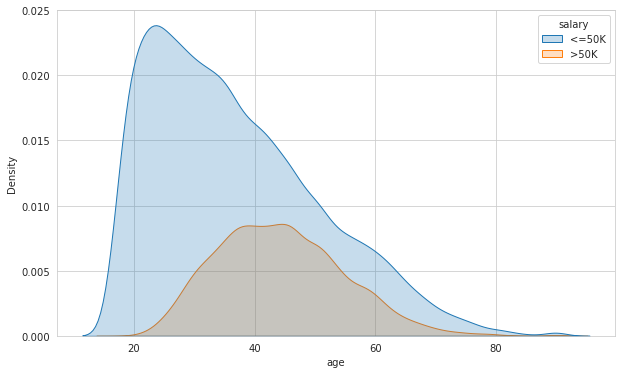

In [27]:
sns.kdeplot(data = df, x = "age", hue = "salary", shade = True);

**Check the statistical values by "salary" levels**

In [28]:
df.groupby("salary")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,36.787,14.017,17.000,25.000,34.000,46.000,90.000
>50K,7839.000,44.251,10.520,19.000,36.000,44.000,51.000,90.000


**Result :** The mean and median age of the high-income group is higher than the low-income group. It means the older generation possesses more wealth than the young.Standard deviation is big both of them. It means that differences of value is big. Low income has average 36.8 age. High income has average 44.3 age.

## fnlwgt

**Check the boxplot to see extreme values**

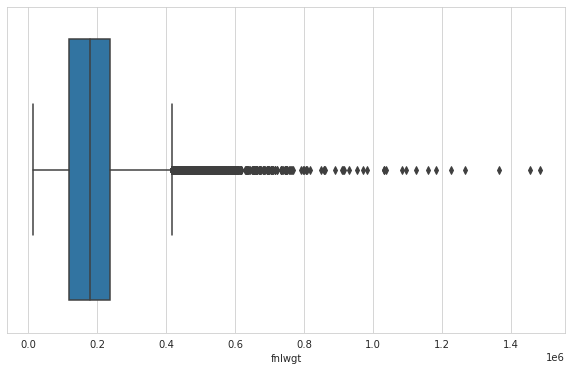

In [29]:
sns.boxplot(data = df, x = "fnlwgt");

**Check the histplot/kdeplot to see distribution of feature**

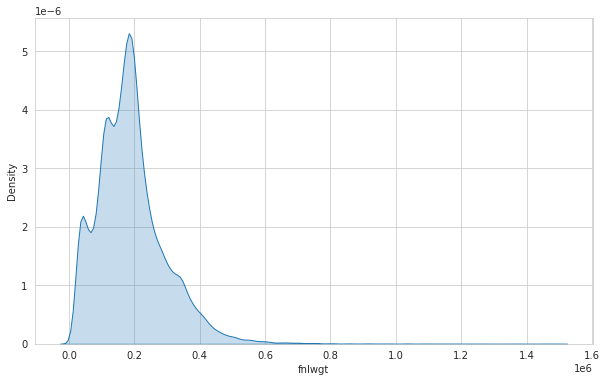

In [30]:
sns.kdeplot(data = df, x = "fnlwgt", shade = True);

**Check the statistical values**

In [31]:
df["fnlwgt"].describe()

count     32537.000
mean     189780.849
std      105556.471
min       12285.000
25%      117827.000
50%      178356.000
75%      236993.000
max     1484705.000
Name: fnlwgt, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

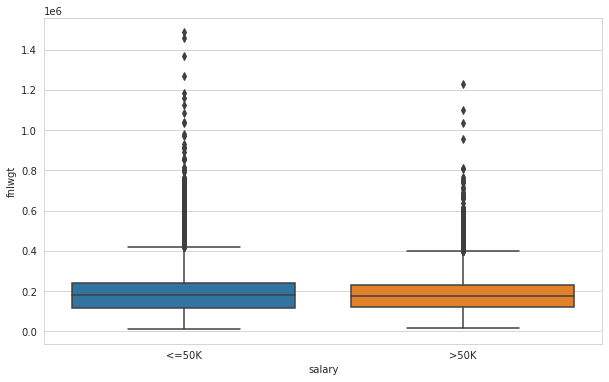

In [32]:
sns.boxplot(data = df, x = "salary", y = "fnlwgt");

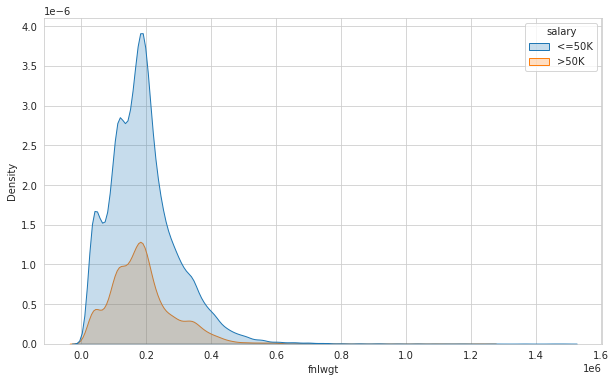

In [33]:
sns.kdeplot(data = df, x = "fnlwgt", shade = True, hue = "salary");

**Check the statistical values by "salary" levels**

In [34]:
df.groupby("salary")["fnlwgt"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,190345.927,106487.413,12285.000,117606.000,179465.000,238968.250,1484705.000
>50K,7839.000,188000.481,102554.464,14878.000,119100.000,176063.000,230969.000,1226583.000


**Result :** There is a very low correlation between salary and "fnlwgt" groups.

## capital_gain

**Check the boxplot to see extreme values**

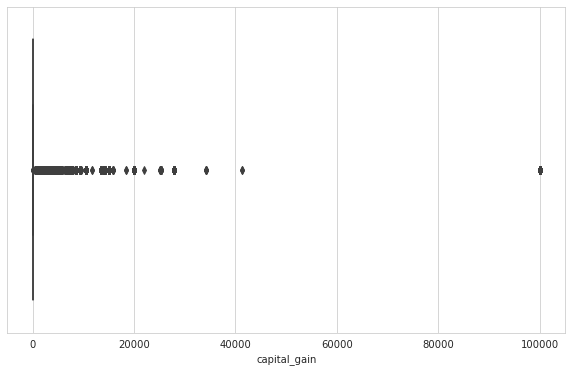

In [35]:
sns.boxplot(data = df, x = "capital_gain");

**Check the histplot/kdeplot to see distribution of feature**

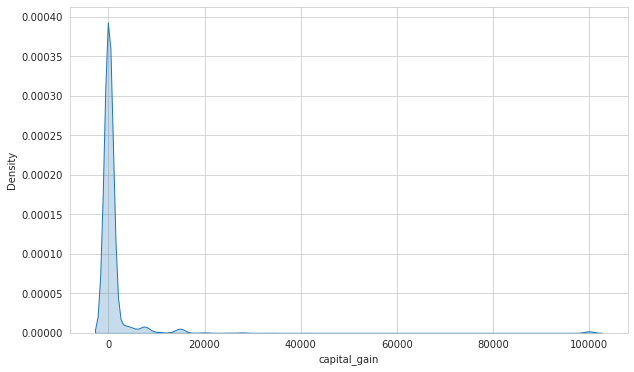

In [36]:
sns.kdeplot(data = df, x = "capital_gain", shade = True);

**Check the statistical values**

In [37]:
df.capital_gain.describe()

count   32537.000
mean     1078.444
std      7387.957
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital_gain, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

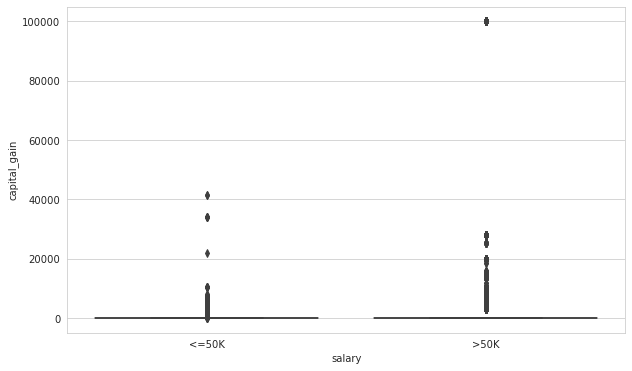

In [38]:
sns.boxplot(data = df, x = "salary", y = "capital_gain");

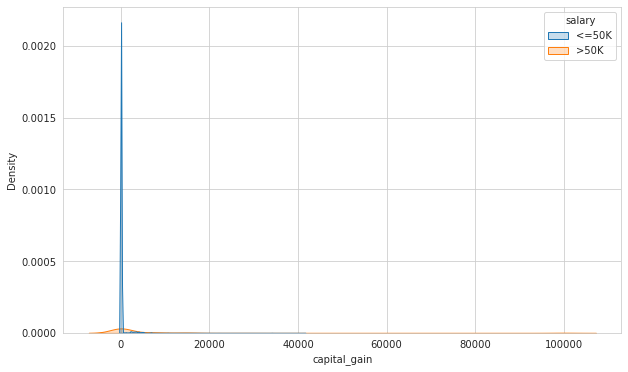

In [39]:
sns.kdeplot(data = df, x = "capital_gain", shade = True, hue = "salary");

**Check the statistical values by "salary" levels**

In [40]:
df.groupby("salary")["capital_gain"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,148.885,963.558,0.000,0.000,0.000,0.000,41310.000
>50K,7839.000,4007.165,14572.097,0.000,0.000,0.000,0.000,99999.000


**Check the statistical values by "salary" levels for capital_gain not equal the zero**

In [41]:
df_drop_cap = df[df["capital_gain"] != 0]

df_drop_cap["capital_gain"].describe()

df_drop_cap.groupby("salary")["capital_gain"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,1035.000,3552.813,3173.419,114.000,2202.000,3273.000,4101.000,41310.000
>50K,1677.000,18731.165,26778.676,3103.000,7298.000,7896.000,15024.000,99999.000


**Result :** The "capital-gain" feature has not provided very meaningful insights. Nevertheless, we can say that the more "capital-gain", the more "high income".

## capital_loss

**Check the boxplot to see extreme values**

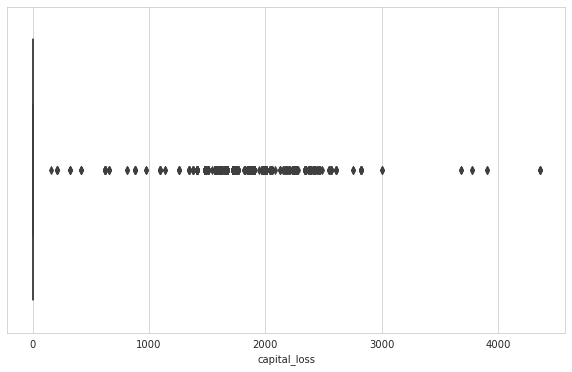

In [42]:
sns.boxplot(data = df, x = "capital_loss");

**Check the histplot/kdeplot to see distribution of feature**

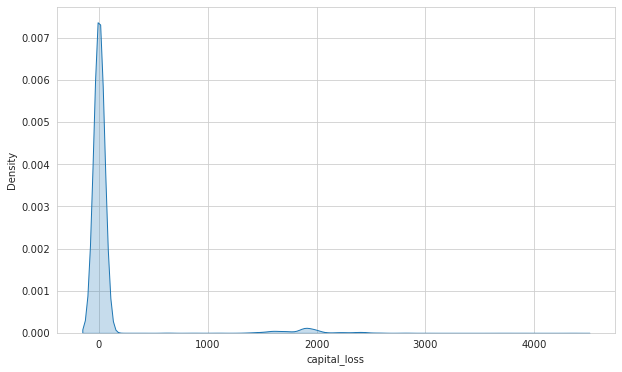

In [43]:
sns.kdeplot(data = df, x = "capital_loss", shade = True);

**Check the statistical values**

In [44]:
df["capital_loss"].describe()

count   32537.000
mean       87.368
std       403.102
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital_loss, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

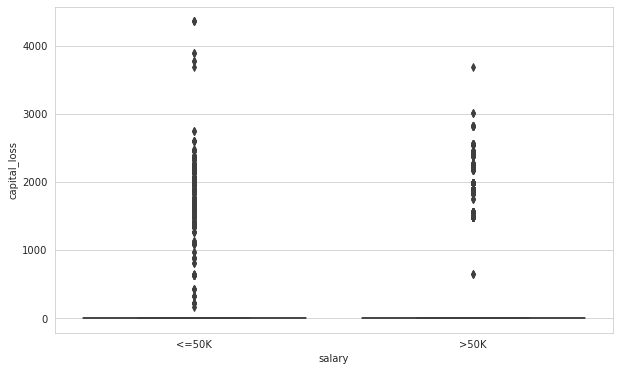

In [45]:
sns.boxplot(data = df, x = "salary", y = "capital_loss");

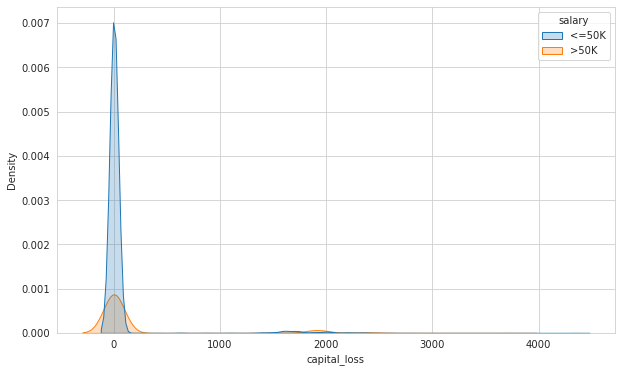

In [46]:
sns.kdeplot(data = df, x = "capital_loss", hue = "salary", shade = True);

**Check the statistical values by "salary" levels**

In [47]:
df.groupby("salary")["capital_loss"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,53.190,310.890,0.000,0.000,0.000,0.000,4356.000
>50K,7839.000,195.051,595.555,0.000,0.000,0.000,0.000,3683.000


**Check the statistical values by "salary" levels for capital_loss not equel the zero**

In [48]:
df.loc[df["capital_loss"] != 0].groupby("salary")["capital_loss"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,746.000,1760.983,438.906,155.000,1590.000,1721.000,1980.000,4356.000
>50K,773.000,1978.017,264.144,653.000,1887.000,1902.000,1977.000,3683.000


**Result :** There is no significant difference between high and low-income groups according to the "capital_loss" feature. There are lots of people capital loss = 0. This efect lots of things.

## hours_per_week

**Check the boxplot to see extreme values**

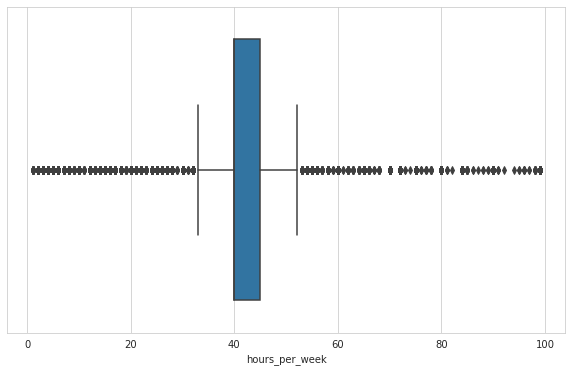

In [49]:
sns.boxplot(data = df, x = "hours_per_week");

**Check the histplot/kdeplot to see distribution of feature**

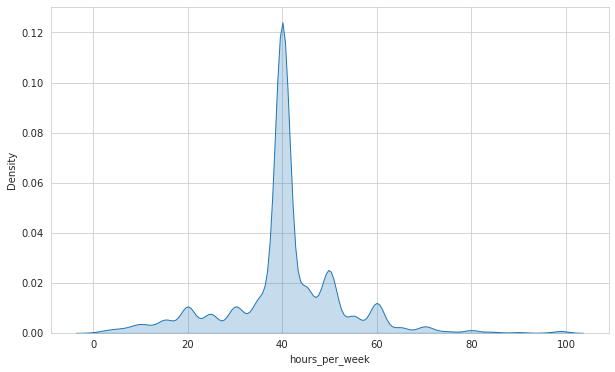

In [50]:
sns.kdeplot(data = df, x = "hours_per_week", shade = True);

Desired Output:

![image.png](https://i.ibb.co/tsp5GXb/30.png)

**Check the statistical values**

In [51]:
df.hours_per_week.describe()

count   32537.000
mean       40.440
std        12.347
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours_per_week, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

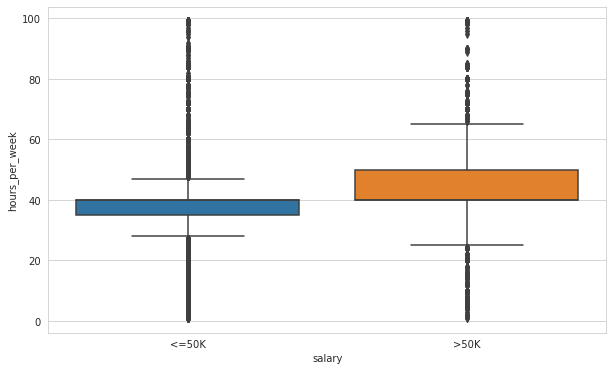

In [52]:
sns.boxplot(data = df, x = "salary", y = "hours_per_week");

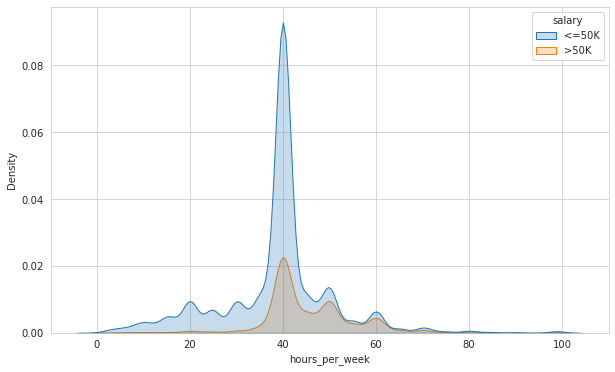

In [53]:
sns.kdeplot(data = df, x = "hours_per_week", hue = "salary", shade = True);

**Check the statistical values by "salary" levels**

In [54]:
df.groupby("salary")["hours_per_week"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,38.843,12.318,1.000,35.000,40.000,40.000,99.000
>50K,7839.000,45.473,11.014,1.000,40.000,40.000,50.000,99.000


**Result :** In a high-income group, average working time is 45 hours  per week. On the other hand, in a low-income group, average working time is 39 hours per week. Both of them are normal disturbution we can say.

### See the relationship between each numeric features by target feature (salary) in one plot basically

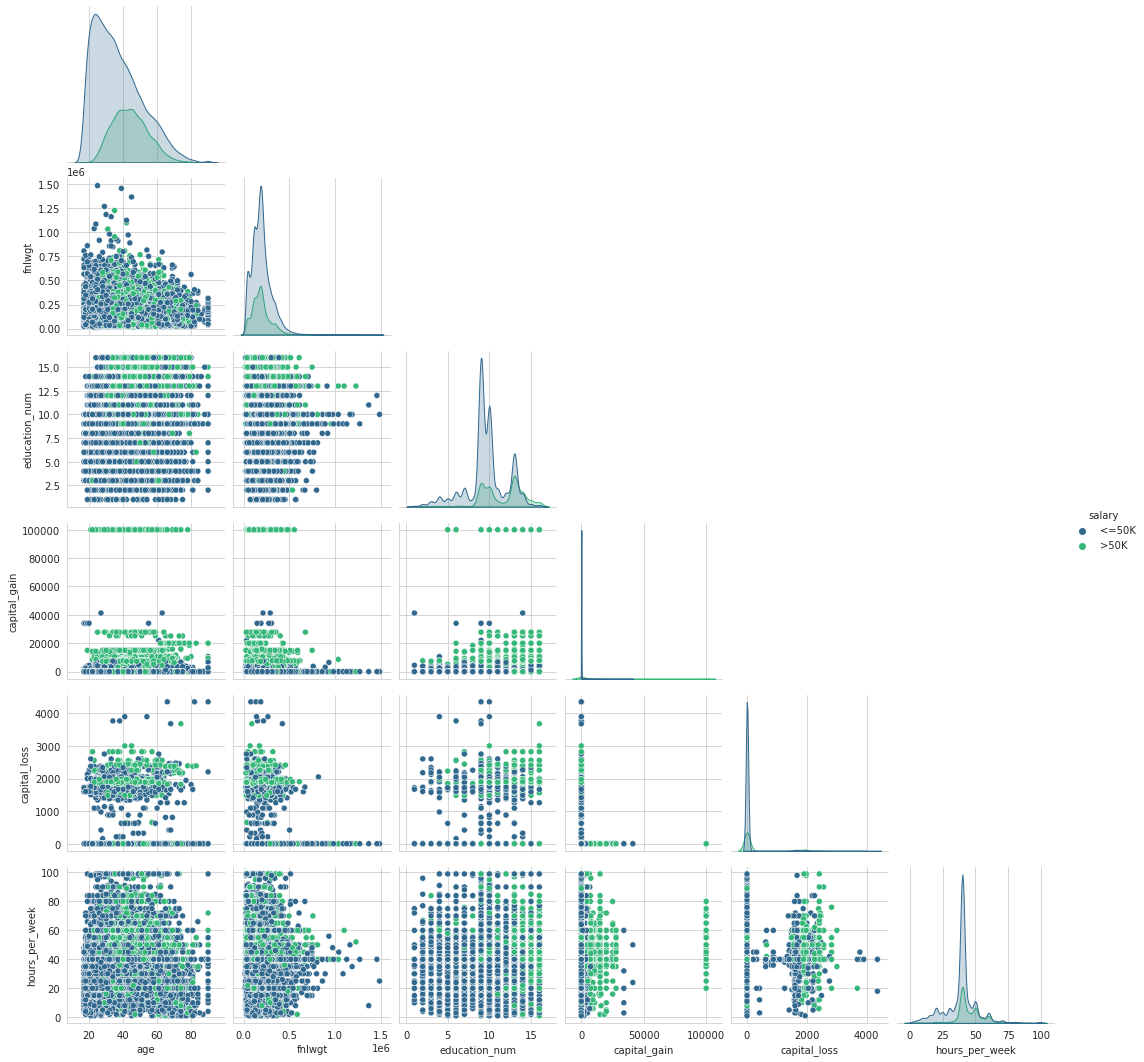

In [55]:
sns.pairplot(data = df, hue = "salary", palette = "viridis", corner = True);

## Categorical Features

## education & education_num

**Detect the similarities between these features by comparing unique values**

In [56]:
df.education.value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [57]:
df.education_num.value_counts()

9.000     10208
10.000     7089
13.000     5245
14.000     1686
11.000     1343
7.000      1146
12.000     1044
6.000       916
4.000       630
15.000      559
5.000       503
8.000       424
16.000      405
3.000       329
2.000       159
1.000        49
Name: education_num, dtype: int64

In [58]:
df.groupby("education")["education_num"].value_counts(dropna = False)

education     education_num
10th          6.000              916
              NaN                 17
11th          7.000             1146
              NaN                 29
12th          8.000              424
              NaN                  9
1st-4th       2.000              159
              NaN                  7
5th-6th       3.000              329
              NaN                  3
7th-8th       4.000              630
              NaN                 15
9th           5.000              503
              NaN                 11
Assoc-acdm    12.000            1044
              NaN                 23
Assoc-voc     11.000            1343
              NaN                 39
Bachelors     13.000            5245
              NaN                108
Doctorate     16.000             405
              NaN                  8
HS-grad       9.000            10208
              NaN                286
Masters       14.000            1686
              NaN                 36
Preschool 

**Visualize the count of person in each categories for these features (education, education_num) separately**

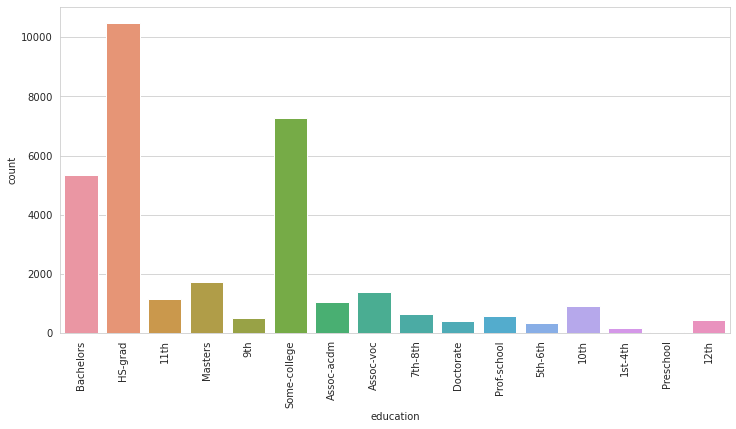

In [59]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(data = df, x = "education")

ax.set_xticklabels(df.education.unique(), rotation=90);

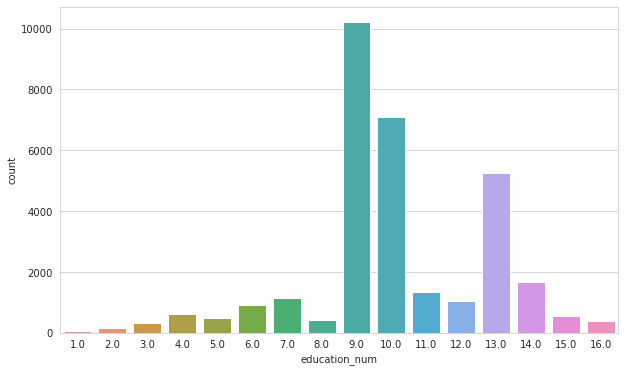

In [60]:
sns.countplot(data = df, x = "education_num");

**Check the count of person in each "salary" levels by these features (education and education_num) separately and visualize them with countplot**

In [61]:
df.groupby("education")["salary"].value_counts()

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: salary, dtype: int64

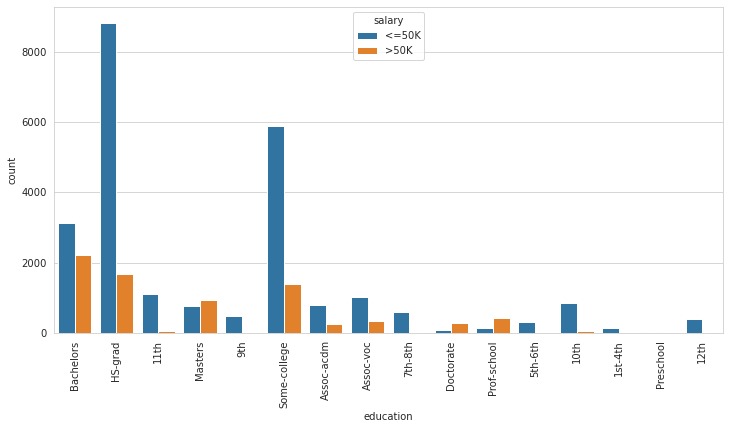

In [62]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(data = df, x = "education", hue = "salary")

ax.set_xticklabels(df.education.unique(), rotation = 90);

In [63]:
df.groupby("education_num")["salary"].value_counts()

education_num  salary
1.000          <=50K       49
2.000          <=50K      153
               >50K         6
3.000          <=50K      313
               >50K        16
4.000          <=50K      592
               >50K        38
5.000          <=50K      477
               >50K        26
6.000          <=50K      854
               >50K        62
7.000          <=50K     1088
               >50K        58
8.000          <=50K      391
               >50K        33
9.000          <=50K     8579
               >50K      1629
10.000         <=50K     5746
               >50K      1343
11.000         <=50K      994
               >50K       349
12.000         <=50K      787
               >50K       257
13.000         <=50K     3078
               >50K      2167
14.000         >50K       935
               <=50K      751
15.000         >50K       410
               <=50K      149
16.000         >50K       302
               <=50K      103
Name: salary, dtype: int64

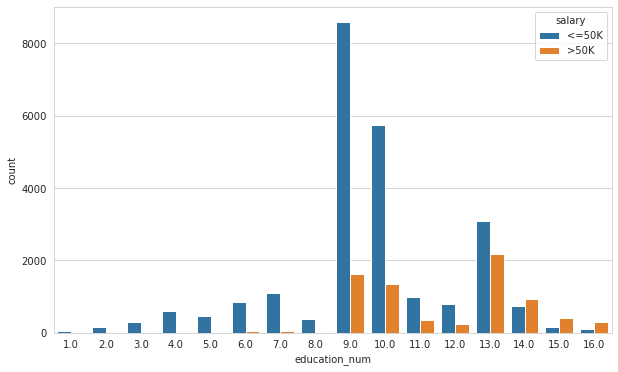

In [64]:
sns.countplot(data = df, x = "education_num", hue = "salary");

**Visualize the boxplot of "education_num" feature by "salary" levels**

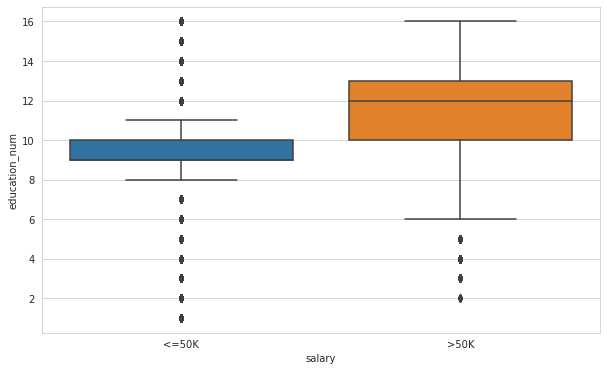

In [65]:
sns.boxplot(data = df, x = "salary", y = "education_num");

**Decrease the number of categories in "education" feature as low, medium, and high level and create a new feature with this new categorical data.**

In [66]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
        return "low_level_grade"
    elif x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
        return "medium_level_grade"
    elif x in ["Bachelors", "Masters", "Prof-school", "Doctorate"]:
        return "high_level_grade"

In [67]:
df.education.apply(mapping_education).value_counts()

medium_level_grade    20225
high_level_grade       8064
low_level_grade        4248
Name: education, dtype: int64

In [68]:
# By using "mapping_education" def function above, create a new column named "education_summary"
df["education_summary"] = df.education.apply(mapping_education)

**Visualize the count of person in each categories for these new education levels (high, medium, low)**

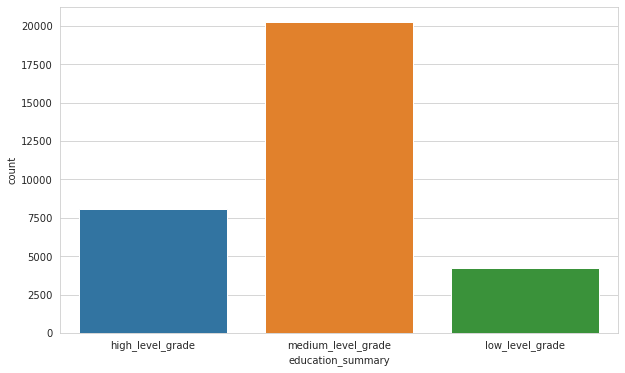

In [69]:
sns.countplot(data = df, x = "education_summary");

**Check the count of person in each "salary" levels by these new education levels(high, medium, low) and visualize it with countplot**

In [70]:
df.groupby("education_summary")["salary"].value_counts()

education_summary   salary
high_level_grade    <=50K      4155
                    >50K       3909
low_level_grade     <=50K      4004
                    >50K        244
medium_level_grade  <=50K     16539
                    >50K       3686
Name: salary, dtype: int64

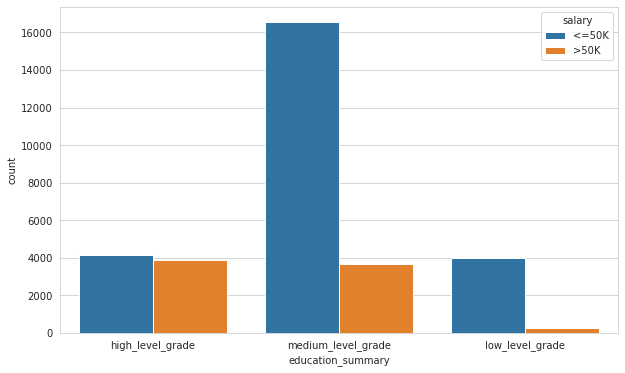

In [71]:
sns.countplot(data = df, x = "education_summary", hue = "salary");

**Check the percentage distribution of person in each "salary" levels by each new education levels (high, medium, low) and visualize it with pie plot separately**

In [72]:
(df.groupby("education_summary")["salary"].value_counts()) / (df.groupby("education_summary")["salary"].count())

education_summary   salary
high_level_grade    <=50K    0.515
                    >50K     0.485
low_level_grade     <=50K    0.943
                    >50K     0.057
medium_level_grade  <=50K    0.818
                    >50K     0.182
Name: salary, dtype: float64

In [73]:
high_edu = (df.groupby("education_summary")["salary"].value_counts() / df.groupby("education_summary")["salary"].count())[:2]
high_edu

education_summary  salary
high_level_grade   <=50K    0.515
                   >50K     0.485
Name: salary, dtype: float64

In [74]:
low_edu = (df.groupby("education_summary")["salary"].value_counts() / df.groupby("education_summary")["salary"].count())[2:4]
low_edu

education_summary  salary
low_level_grade    <=50K    0.943
                   >50K     0.057
Name: salary, dtype: float64

In [75]:
medium_edu = (df.groupby("education_summary")["salary"].value_counts() / df.groupby("education_summary")["salary"].count())[4:6]
medium_edu

education_summary   salary
medium_level_grade  <=50K    0.818
                    >50K     0.182
Name: salary, dtype: float64

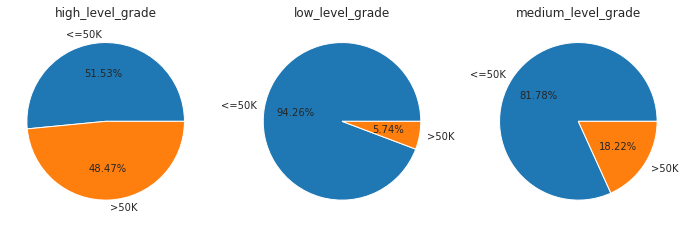

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 6))

ax1.pie(x = high_edu, labels = ["<=50K", ">50K"], autopct = "%.2f%%")
ax1.set_ylabel = ("salary")
ax1.set_title("high_level_grade")

ax2.pie(x = low_edu, labels = ["<=50K", ">50K"],autopct = "%.2f%%")
ax2.set_ylabel = ("salary")
ax2.set_title("low_level_grade")

ax3.pie(x = medium_edu, labels = ["<=50K", ">50K"],  autopct = "%.2f%%")
ax3.set_ylabel = ("salary")
ax3.set_title("medium_level_grade");

**Check the count of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with countplot**

In [77]:
df.groupby("salary")["education_summary"].value_counts()

salary  education_summary 
<=50K   medium_level_grade    16539
        high_level_grade       4155
        low_level_grade        4004
>50K    high_level_grade       3909
        medium_level_grade     3686
        low_level_grade         244
Name: education_summary, dtype: int64

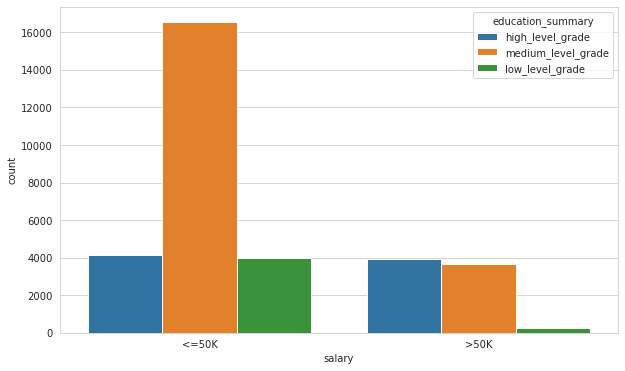

In [78]:
sns.countplot(data = df, x = "salary", hue = "education_summary");

**Check the the percentage distribution of person in each these new education levels(high, medium, low) by "salary" levels and visualize it with pie plot separately**

In [79]:
df.groupby("salary")["education_summary"].value_counts() / df.groupby("salary")["education_summary"].count()

salary  education_summary 
<=50K   medium_level_grade   0.670
        high_level_grade     0.168
        low_level_grade      0.162
>50K    high_level_grade     0.499
        medium_level_grade   0.470
        low_level_grade      0.031
Name: education_summary, dtype: float64

In [80]:
low_sal = (df.groupby("salary")["education_summary"].value_counts() / df.groupby("salary")["education_summary"].count())[:3]
low_sal

salary  education_summary 
<=50K   medium_level_grade   0.670
        high_level_grade     0.168
        low_level_grade      0.162
Name: education_summary, dtype: float64

In [81]:
high_sal = (df.groupby("salary")["education_summary"].value_counts() / df.groupby("salary")["education_summary"].count())[3:6]
high_sal

salary  education_summary 
>50K    high_level_grade     0.499
        medium_level_grade   0.470
        low_level_grade      0.031
Name: education_summary, dtype: float64

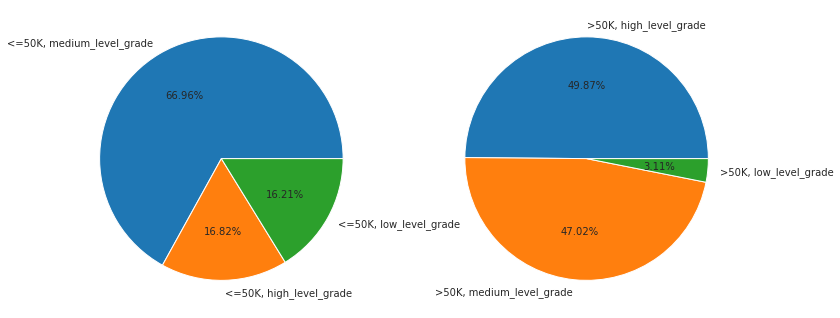

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.pie(x = low_sal, labels = ["<=50K, medium_level_grade", "<=50K, high_level_grade", "<=50K, low_level_grade"], autopct = "%.2f%%"
)
ax1.set_ylabel = ("education_summary")
ax1.set_title = ("<=50K")

ax2.pie(x = high_sal, labels = [">50K, high_level_grade", ">50K, medium_level_grade", ">50K, low_level_grade"], autopct = "%.2f%%"
)
ax2.set_ylabel = ("education_summary")
ax2.set_title = (">50K");

In [83]:
salary = df.groupby("salary")["education_summary"].value_counts() / df.groupby("salary")["education_summary"].count()
salary

salary  education_summary 
<=50K   medium_level_grade   0.670
        high_level_grade     0.168
        low_level_grade      0.162
>50K    high_level_grade     0.499
        medium_level_grade   0.470
        low_level_grade      0.031
Name: education_summary, dtype: float64

In [84]:
salary_table = pd.DataFrame(salary)
salary_table

salary_table.rename(columns = {"education_summary": "percentage"}, inplace = True)
salary_table

salary_table.reset_index(level=[0,1],inplace=True)
salary_table

,salary,education_summary,percentage
0,<=50K,medium_level_grade,0.670
1,<=50K,high_level_grade,0.168
2,<=50K,low_level_grade,0.162
3,>50K,high_level_grade,0.499
4,>50K,medium_level_grade,0.470
5,>50K,low_level_grade,0.031


In [85]:
low_1 = (df.groupby("salary")["education_summary"].value_counts() / df.groupby("salary")["education_summary"].count())[:3]
low_1

salary  education_summary 
<=50K   medium_level_grade   0.670
        high_level_grade     0.168
        low_level_grade      0.162
Name: education_summary, dtype: float64

In [86]:
high_1 = (df.groupby("salary")["education_summary"].value_counts() / df.groupby("salary")["education_summary"].count())[3:6]
high_1

salary  education_summary 
>50K    high_level_grade     0.499
        medium_level_grade   0.470
        low_level_grade      0.031
Name: education_summary, dtype: float64

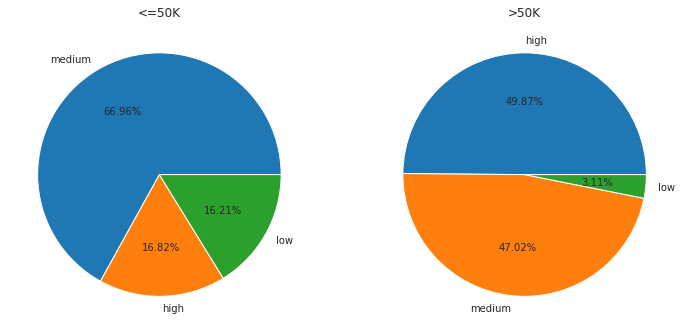

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.pie(x = low_1, labels = ["medium", "high", "low"], autopct = "%.2f%%")
ax1.set_title("<=50K")

ax2.pie(x = high_1, labels = ["high", "medium", "low"], autopct = "%.2f%%")
ax2.set_title(">50K");

**Result :** We can easily say that the more education means more high income. However 82% of medium level grade earn lower than $50000

## marital_status & relationship

**Detect the similarities between these features by comparing unique values**

In [88]:
df["marital_status"].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [89]:
df["relationship"].value_counts(dropna = False)

Husband           13187
Not-in-family      8292
NaN                5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [90]:
# Fill missing values with "Unknown" in the column of "relationship"

df.fillna("Unknown", inplace = True)

In [91]:
df.groupby("relationship")["marital_status"].value_counts()

relationship    marital_status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unknown         Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

**Visualize the count of person in each categories**

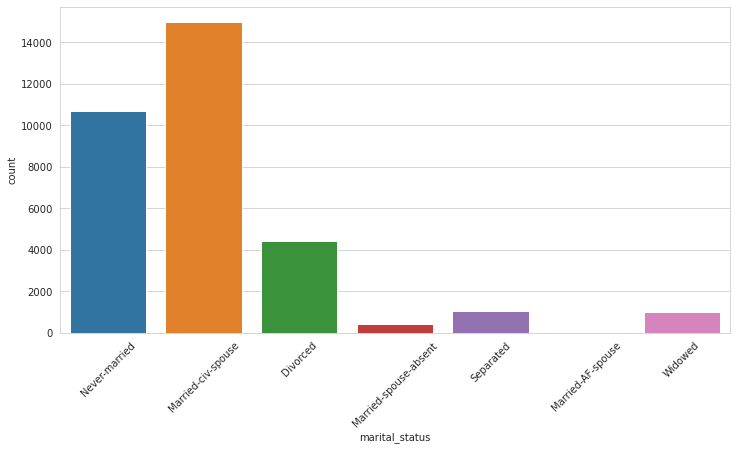

In [92]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(data = df, x = "marital_status")

ax.set_xticklabels(df["marital_status"].unique(), rotation = 45);

**Check the count of person in each "salary" levels by categories and visualize it with countplot**

In [93]:
df.groupby("marital_status")["salary"].value_counts()

marital_status         salary
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: salary, dtype: int64

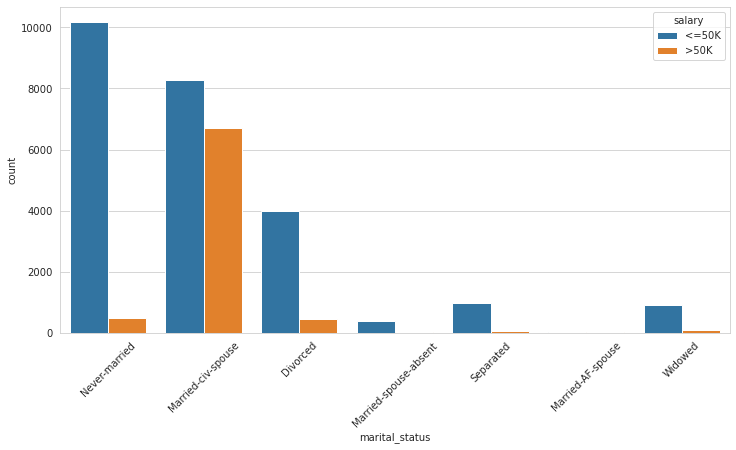

In [94]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(data = df, x = "marital_status", hue = "salary")

ax.set_xticklabels(df.marital_status.unique(), rotation = 45);

**Decrease the number of categories in "marital_status" feature as married, and unmarried and create a new feature with this new categorical data**

In [95]:
def mapping_marital_status(x):
    if x in ["Never-married", "Divorced", "Separated", "Widowed"]:
        return "unmarried"
    elif x in ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"]:
        return "married"

In [96]:
df.marital_status.apply(mapping_marital_status).value_counts()

unmarried    17126
married      15411
Name: marital_status, dtype: int64

In [97]:
# By using "mapping_marital_status" def function above, create a new column named "marital_status_summary"
df["marital_status_summary"] = df.marital_status.apply(mapping_marital_status)

**Visualize the count of person in each categories for these new marital status (married, unmarried)**

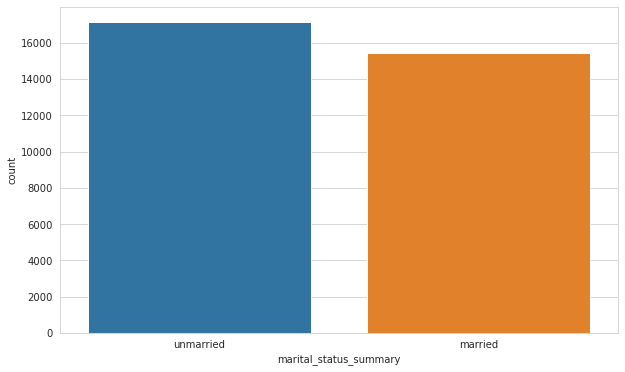

In [98]:
sns.countplot(data = df, x = "marital_status_summary");

**Check the count of person in each "salary" levels by these new marital status (married, unmarried) and visualize it with countplot**

In [99]:
df.groupby("marital_status_summary")["salary"].value_counts()

marital_status_summary  salary
married                 <=50K      8677
                        >50K       6734
unmarried               <=50K     16021
                        >50K       1105
Name: salary, dtype: int64

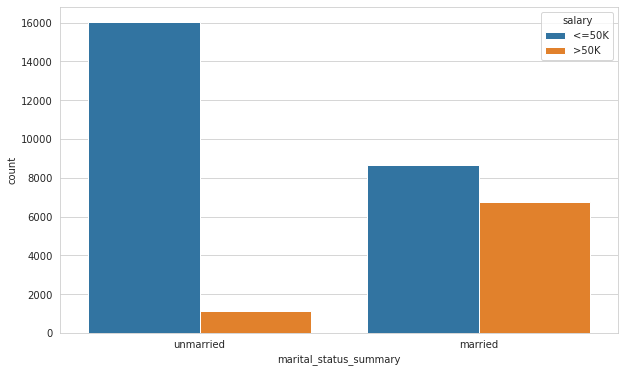

In [100]:
sns.countplot(data = df, x = "marital_status_summary", hue = "salary");

**Check the percentage distribution of person in each "salary" levels by each new marital status (married, unmarried) and visualize it with pie plot separately**

In [101]:
df.groupby("marital_status_summary")["salary"].value_counts() / df.groupby("marital_status_summary")["salary"].count()

marital_status_summary  salary
married                 <=50K    0.563
                        >50K     0.437
unmarried               <=50K    0.935
                        >50K     0.065
Name: salary, dtype: float64

In [102]:
married = (df.groupby("marital_status_summary")["salary"].value_counts() / df.groupby("marital_status_summary")["salary"].count())[:2]
married

marital_status_summary  salary
married                 <=50K    0.563
                        >50K     0.437
Name: salary, dtype: float64

In [103]:
unmarried = (df.groupby("marital_status_summary")["salary"].value_counts() / df.groupby("marital_status_summary")["salary"].count())[2:4]
unmarried

marital_status_summary  salary
unmarried               <=50K    0.935
                        >50K     0.065
Name: salary, dtype: float64

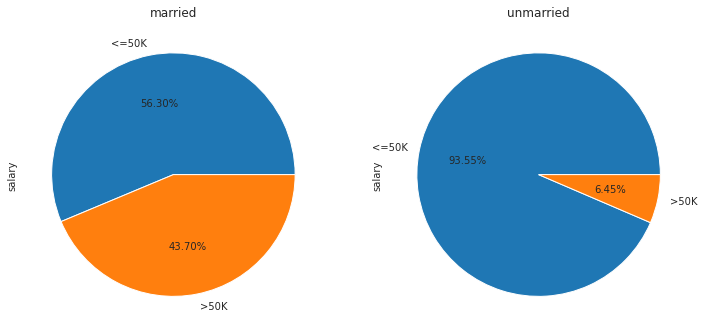

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.pie(x = married, labels = ["<=50K", ">50K"], autopct = "%.2f%%")
ax1.set_ylabel("salary")
ax1.set_title("married")

ax2.pie(x = unmarried, labels = ["<=50K", ">50K"], autopct = "%.2f%%")
ax2.set_ylabel("salary")
ax2.set_title("unmarried");

**Check the count of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with countplot**

In [105]:
df.groupby("salary")["marital_status_summary"].value_counts()

salary  marital_status_summary
<=50K   unmarried                 16021
        married                    8677
>50K    married                    6734
        unmarried                  1105
Name: marital_status_summary, dtype: int64

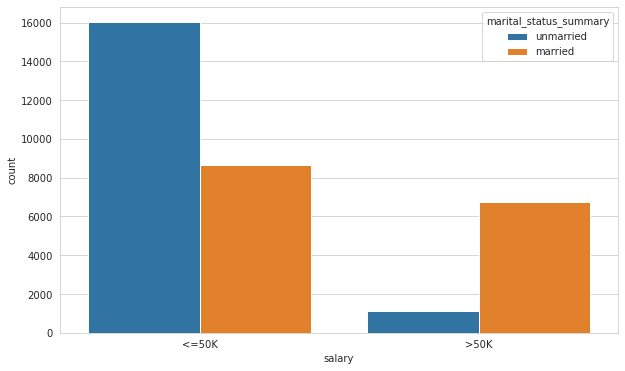

In [106]:
sns.countplot(data = df, x = "salary", hue = "marital_status_summary");

**Check the the percentage distribution of person in each these new marital status (married, unmarried) by "salary" levels and visualize it with pie plot separately**

In [107]:
df.groupby("salary")["marital_status_summary"].value_counts() / df.groupby("salary")["marital_status_summary"].count()

salary  marital_status_summary
<=50K   unmarried                0.649
        married                  0.351
>50K    married                  0.859
        unmarried                0.141
Name: marital_status_summary, dtype: float64

In [108]:
sal_mar = df.groupby("salary")["marital_status_summary"].value_counts() / df.groupby("salary")["marital_status_summary"].count()

In [109]:
sal_mar_table = pd.DataFrame(sal_mar)
sal_mar_table

sal_mar_table.rename(columns = {"marital_status_summary": "percentage"}, inplace = True)
sal_mar_table

sal_mar_table.reset_index(level = [0, 1], inplace = True)
sal_mar_table

sal_mar_table.sort_values(by = ["salary", "marital_status_summary"])
sal_mar_table

,salary,marital_status_summary,percentage
0,<=50K,unmarried,0.649
1,<=50K,married,0.351
2,>50K,married,0.859
3,>50K,unmarried,0.141


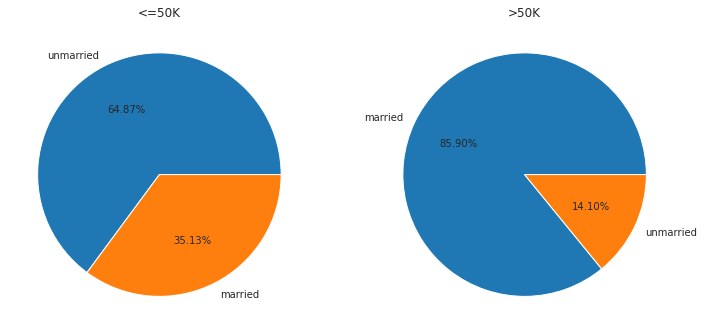

In [110]:
low_salary = (df.groupby("salary")["marital_status_summary"].value_counts() * 100 / 
df.groupby("salary")["marital_status_summary"].count())[:2]

high_salary = (df.groupby("salary")["marital_status_summary"].value_counts() * 100 / 
df.groupby("salary")["marital_status_summary"].count())[2:4]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.pie(x = low_salary, labels = ["unmarried", "married"], autopct = "%.2f%%")
ax1.set_ylabel = ("percentage")
ax1.set_title("<=50K")

ax2.pie(x = high_salary, labels = ["married", "unmarried"], autopct = "%.2f%%")
ax2.set_ylabel = ("percentage")
ax2.set_title(">50K");

**Result :** We can easily say that married persons have earned more income than unmarried persons. Most of people in high income are married and most of people in low income are unmarried.

## workclass

**Check the count of person in each categories and visualize it with countplot**

In [111]:
df.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

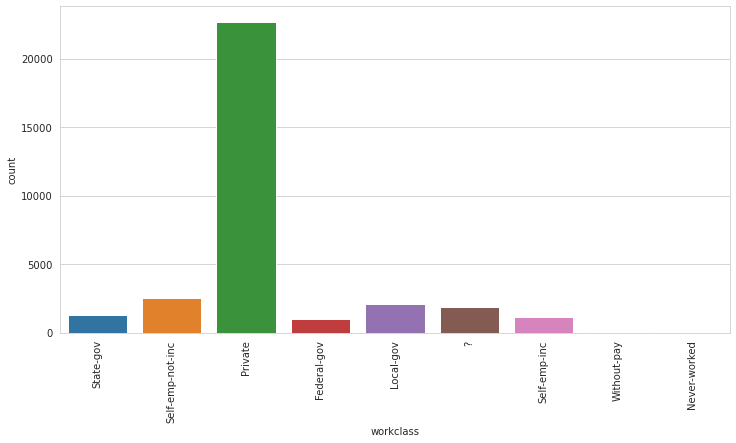

In [112]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(data = df, x = "workclass")

ax.set_xticklabels(df.workclass.unique(), rotation = 90);

**Replace the value "?" to the value "Unknown"** 

In [113]:
# Replace "?" values with "Unkown"

df.workclass.replace("?", "Unknown", inplace = True)

**Check the count of person in each "salary" levels by workclass groups and visualize it with countplot**

In [114]:
df.groupby("workclass")["salary"].value_counts()

workclass         salary
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Unknown           <=50K      1645
                  >50K        191
Without-pay       <=50K        14
Name: salary, dtype: int64

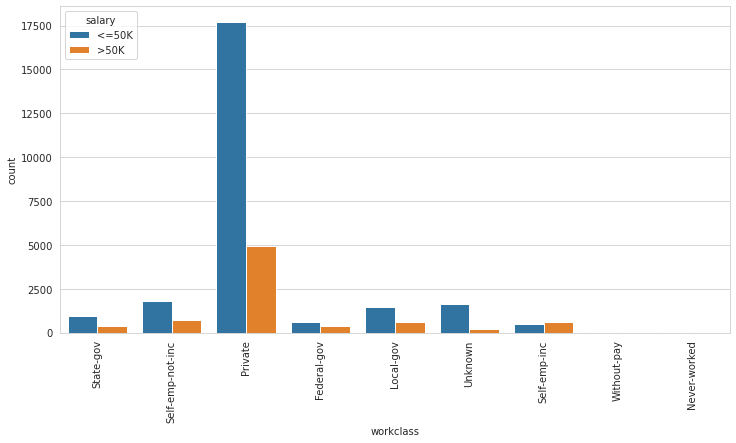

In [115]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(data = df, x = "workclass", hue = "salary")

ax.set_xticklabels(df.workclass.unique(), rotation = 90);

**Check the percentage distribution of person in each "salary" levels by each workclass groups and visualize it with bar plot**

In [116]:
df.groupby("workclass")["salary"].value_counts() / df.groupby("workclass")["salary"].count()

workclass         salary
Federal-gov       <=50K    0.614
                  >50K     0.386
Local-gov         <=50K    0.705
                  >50K     0.295
Never-worked      <=50K    1.000
Private           <=50K    0.781
                  >50K     0.219
Self-emp-inc      >50K     0.557
                  <=50K    0.443
Self-emp-not-inc  <=50K    0.715
                  >50K     0.285
State-gov         <=50K    0.728
                  >50K     0.272
Unknown           <=50K    0.896
                  >50K     0.104
Without-pay       <=50K    1.000
Name: salary, dtype: float64

In [117]:
per_sal = df.groupby("workclass")["salary"].value_counts() / df.groupby("workclass")["salary"].count()

tab_per = pd.DataFrame(per_sal)

tab_per.rename(columns = {"salary": "percentage"}, inplace = True)

tab_per.reset_index(level = [0, 1], inplace = True)

tab_per

,workclass,salary,percentage
0,Federal-gov,<=50K,0.614
1,Federal-gov,>50K,0.386
2,Local-gov,<=50K,0.705
3,Local-gov,>50K,0.295
4,Never-worked,<=50K,1.000
5,Private,<=50K,0.781
6,Private,>50K,0.219
7,Self-emp-inc,>50K,0.557
8,Self-emp-inc,<=50K,0.443
9,Self-emp-not-inc,<=50K,0.715


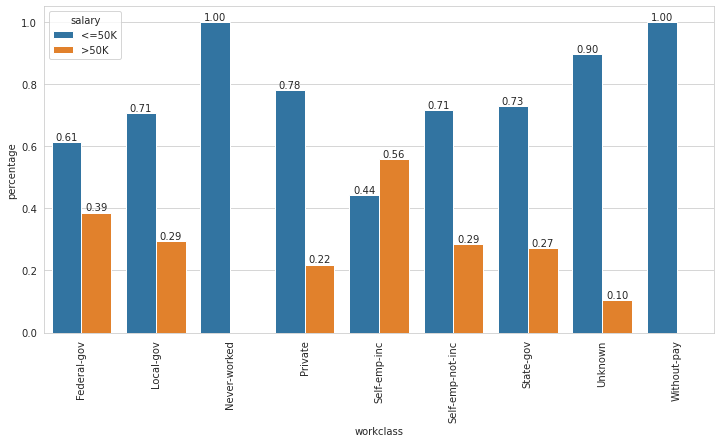

In [118]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(data = tab_per, x = "workclass", y = "percentage", hue = "salary")

ax.set_xticklabels(tab_per.workclass.unique(), rotation = 90)

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f");

**Check the count of person in each workclass groups by "salary" levels and visualize it with countplot**

In [119]:
df.groupby("salary")["workclass"].value_counts()

salary  workclass       
<=50K   Private             17712
        Self-emp-not-inc     1816
        Unknown              1645
        Local-gov            1476
        State-gov             945
        Federal-gov           589
        Self-emp-inc          494
        Without-pay            14
        Never-worked            7
>50K    Private              4961
        Self-emp-not-inc      724
        Self-emp-inc          622
        Local-gov             617
        Federal-gov           371
        State-gov             353
        Unknown               191
Name: workclass, dtype: int64

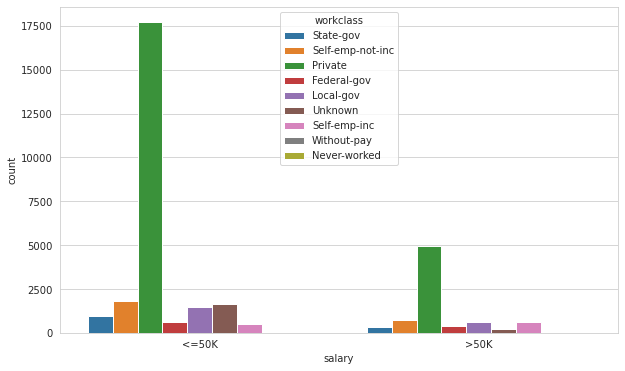

In [120]:
sns.countplot(data = df, x = "salary", hue = "workclass");

**Check the the percentage distribution of person in each workclass groups by "salary" levels and visualize it with countplot**

In [121]:
df.groupby("salary")["workclass"].value_counts() / df.groupby("salary")["workclass"].count()

salary  workclass       
<=50K   Private            0.717
        Self-emp-not-inc   0.074
        Unknown            0.067
        Local-gov          0.060
        State-gov          0.038
        Federal-gov        0.024
        Self-emp-inc       0.020
        Without-pay        0.001
        Never-worked       0.000
>50K    Private            0.633
        Self-emp-not-inc   0.092
        Self-emp-inc       0.079
        Local-gov          0.079
        Federal-gov        0.047
        State-gov          0.045
        Unknown            0.024
Name: workclass, dtype: float64

In [122]:
work_per = df.groupby("salary")["workclass"].value_counts() / df.groupby("salary")["workclass"].count()

tab_work = pd.DataFrame(work_per)

tab_work.rename(columns = {"workclass": "percentage"}, inplace = True)

tab_work.reset_index(level = [0, 1], inplace =True)

tab_work

,salary,workclass,percentage
0,<=50K,Private,0.717
1,<=50K,Self-emp-not-inc,0.074
2,<=50K,Unknown,0.067
3,<=50K,Local-gov,0.060
4,<=50K,State-gov,0.038
5,<=50K,Federal-gov,0.024
6,<=50K,Self-emp-inc,0.020
7,<=50K,Without-pay,0.001
8,<=50K,Never-worked,0.000
9,>50K,Private,0.633


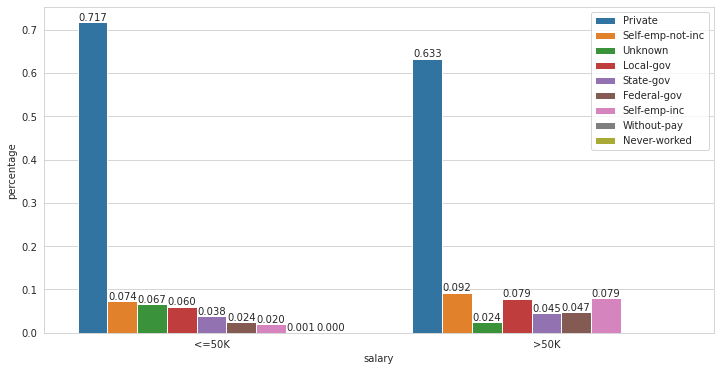

In [123]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(data = tab_work, x = "salary", y = "percentage", hue = "workclass")

plt.legend(loc = "upper right");

for i in ax.containers:
    ax.bar_label(i,fmt="%.3f");

**Write down the conclusions you draw from your analysis**

**Result :** "Private" work-class has a high ratio in the self group about high-level income. "Private" work-class has a high ratio in the low-income group.

## occupation

**Check the count of person in each categories and visualize it with countplot**

In [124]:
df.occupation.value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

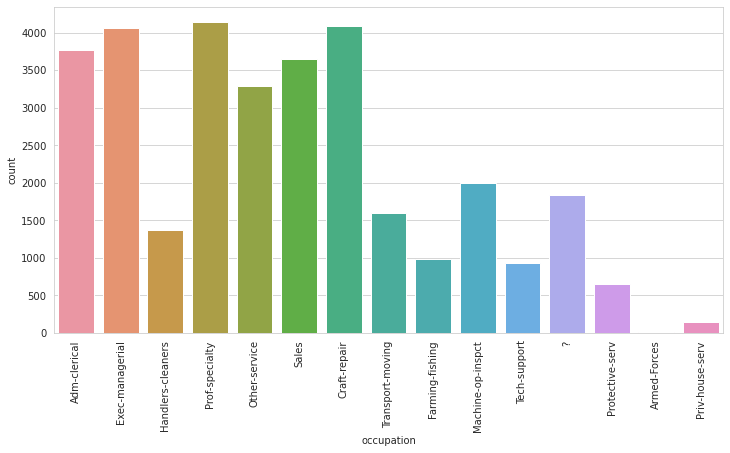

In [125]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(data = df, x = "occupation")

ax.set_xticklabels(df.occupation.unique(), rotation = 90);

**Replace the value "?" to the value "Unknown"**

In [126]:
# Replace "?" values with "Unknown"
df.occupation.replace("?", "Unknown", inplace = True)

**Check the count of person in each "salary" levels by occupation groups and visualize it with countplot**

In [127]:
df.groupby("occupation")["salary"].value_counts()

occupation         salary
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=50K     1277
                   >50K       320
Unknown            <=5

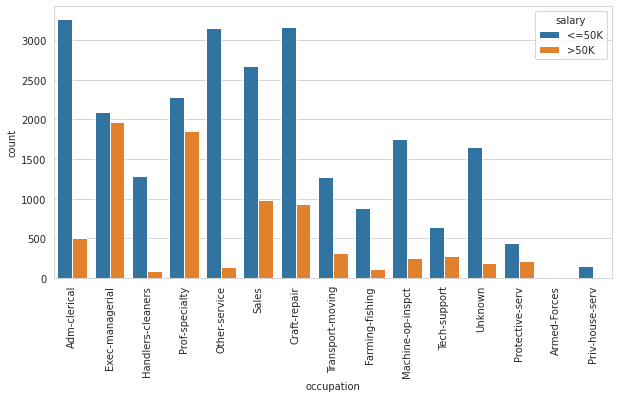

In [128]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = df, x = "occupation", hue = "salary")

ax.set_xticklabels(df.occupation.unique(), rotation = 90);

**Check the percentage distribution of person in each "salary" levels by each occupation groups and visualize it with bar plot**

In [129]:
df.groupby("occupation")["salary"].value_counts() / df.groupby("occupation")["salary"].count()

occupation         salary
Adm-clerical       <=50K    0.865
                   >50K     0.135
Armed-Forces       <=50K    0.889
                   >50K     0.111
Craft-repair       <=50K    0.773
                   >50K     0.227
Exec-managerial    <=50K    0.516
                   >50K     0.484
Farming-fishing    <=50K    0.884
                   >50K     0.116
Handlers-cleaners  <=50K    0.937
                   >50K     0.063
Machine-op-inspct  <=50K    0.875
                   >50K     0.124
Other-service      <=50K    0.958
                   >50K     0.042
Priv-house-serv    <=50K    0.993
                   >50K     0.007
Prof-specialty     <=50K    0.551
                   >50K     0.449
Protective-serv    <=50K    0.675
                   >50K     0.325
Sales              <=50K    0.731
                   >50K     0.269
Tech-support       <=50K    0.695
                   >50K     0.305
Transport-moving   <=50K    0.800
                   >50K     0.200
Unknown            <=5

In [130]:
per_occ = df.groupby("occupation")["salary"].value_counts() / df.groupby("occupation")["salary"].count()

tab_occ = pd.DataFrame(per_occ)

tab_occ.rename(columns = {"salary": "percentage"}, inplace = True)

tab_occ.reset_index(level = [0, 1], inplace = True)

tab_occ

,occupation,salary,percentage
0,Adm-clerical,<=50K,0.865
1,Adm-clerical,>50K,0.135
2,Armed-Forces,<=50K,0.889
3,Armed-Forces,>50K,0.111
4,Craft-repair,<=50K,0.773
5,Craft-repair,>50K,0.227
6,Exec-managerial,<=50K,0.516
7,Exec-managerial,>50K,0.484
8,Farming-fishing,<=50K,0.884
9,Farming-fishing,>50K,0.116


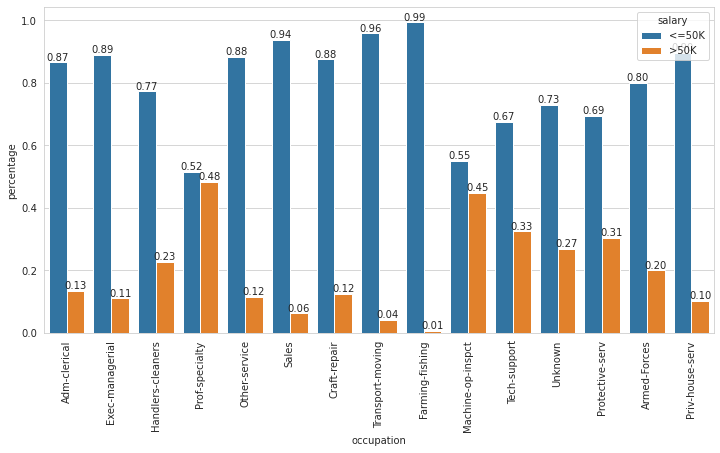

In [131]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(data = tab_occ, x = "occupation", y = "percentage", hue = "salary")

ax.set_xticklabels(df.occupation.unique(), rotation = 90)

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f");

**Check the count of person in each occupation groups by "salary" levels and visualize it with countplot**

In [132]:
df.groupby("salary")["occupation"].value_counts()

salary  occupation       
<=50K   Adm-clerical         3261
        Craft-repair         3165
        Other-service        3154
        Sales                2667
        Prof-specialty       2278
        Exec-managerial      2097
        Machine-op-inspct    1751
        Unknown              1652
        Handlers-cleaners    1283
        Transport-moving     1277
        Farming-fishing       877
        Tech-support          644
        Protective-serv       438
        Priv-house-serv       146
        Armed-Forces            8
>50K    Exec-managerial      1968
        Prof-specialty       1858
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     249
        Protective-serv       211
        Unknown               191
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces  

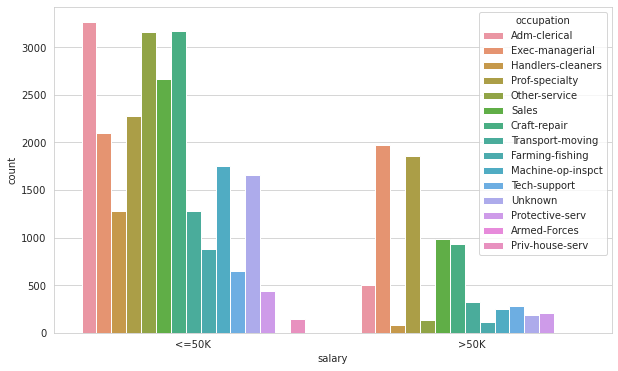

In [133]:
sns.countplot(data = df, x = "salary", hue = "occupation");

**Check the the percentage distribution of person in each occupation groups by "salary" levels and visualize it with bar plot**

In [134]:
df.groupby("salary")["occupation"].value_counts() / df.groupby("salary")["occupation"].count()

salary  occupation       
<=50K   Adm-clerical        0.132
        Craft-repair        0.128
        Other-service       0.128
        Sales               0.108
        Prof-specialty      0.092
        Exec-managerial     0.085
        Machine-op-inspct   0.071
        Unknown             0.067
        Handlers-cleaners   0.052
        Transport-moving    0.052
        Farming-fishing     0.036
        Tech-support        0.026
        Protective-serv     0.018
        Priv-house-serv     0.006
        Armed-Forces        0.000
>50K    Exec-managerial     0.251
        Prof-specialty      0.237
        Sales               0.125
        Craft-repair        0.119
        Adm-clerical        0.065
        Transport-moving    0.041
        Tech-support        0.036
        Machine-op-inspct   0.032
        Protective-serv     0.027
        Unknown             0.024
        Other-service       0.017
        Farming-fishing     0.015
        Handlers-cleaners   0.011
        Armed-Forces  

In [135]:
occ_per = df.groupby("salary")["occupation"].value_counts() / df.groupby("salary")["occupation"].count()

tab_occ = pd.DataFrame(occ_per)

tab_occ.rename(columns = {"occupation": "percentage"}, inplace = True)

tab_occ.reset_index(level = [0, 1], inplace = True)

tab_occ

,salary,occupation,percentage
0,<=50K,Adm-clerical,0.132
1,<=50K,Craft-repair,0.128
2,<=50K,Other-service,0.128
3,<=50K,Sales,0.108
4,<=50K,Prof-specialty,0.092
5,<=50K,Exec-managerial,0.085
6,<=50K,Machine-op-inspct,0.071
7,<=50K,Unknown,0.067
8,<=50K,Handlers-cleaners,0.052
9,<=50K,Transport-moving,0.052


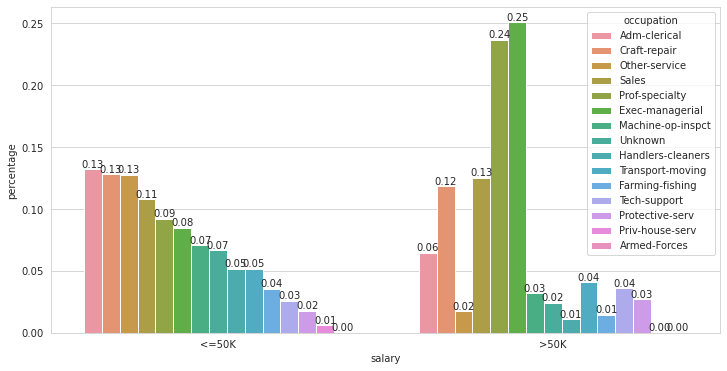

In [136]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(data = tab_occ, x = "salary", y = "percentage", hue = "occupation")

for i in ax.containers:
    ax.bar_label(i,fmt="%.2f");

**Result :** "Exec-managerial" and "Prof-specialty" occupations have a high ratio (~ %50) of high-level income both in the self group and in the high-income group. There is no high ratio differences between occupations in low-level income group.

## race

**Check the count of person in each categories and visualize it with countplot**

In [137]:
df["race"].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

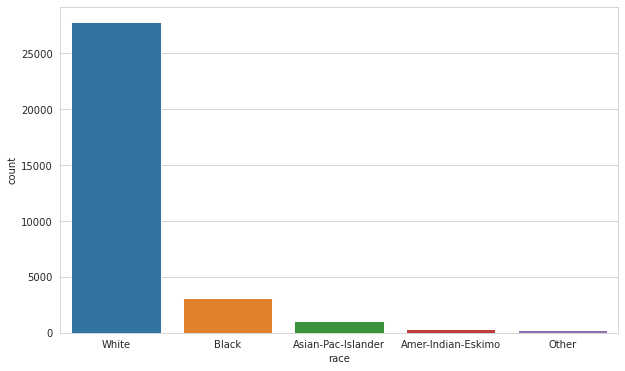

In [138]:
sns.countplot(data = df, x = "race");

**Check the count of person in each "salary" levels by races and visualize it with countplot**

In [139]:
df.groupby("race")["salary"].value_counts()

race                salary
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: salary, dtype: int64

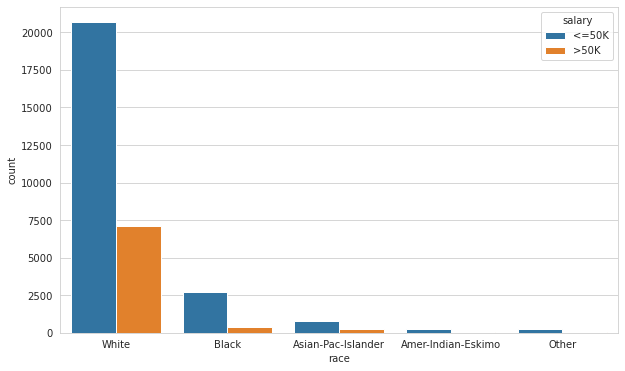

In [140]:
sns.countplot(data = df, x = "race", hue = "salary");

**Check the percentage distribution of person in each "salary" levels by each races and visualize it with pie plot**

In [141]:
df.groupby("race")["salary"].value_counts() / df.groupby("race")["salary"].count()

race                salary
Amer-Indian-Eskimo  <=50K    0.884
                    >50K     0.116
Asian-Pac-Islander  <=50K    0.734
                    >50K     0.266
Black               <=50K    0.876
                    >50K     0.124
Other               <=50K    0.908
                    >50K     0.092
White               <=50K    0.744
                    >50K     0.256
Name: salary, dtype: float64

In [142]:

amer_sal = (df.groupby("race")["salary"].value_counts() *100 / df.groupby("race")["salary"].count())[:2]
asian_sal = (df.groupby("race")["salary"].value_counts() *100 / df.groupby("race")["salary"].count())[2:4]
black_sal = (df.groupby("race")["salary"].value_counts() *100 / df.groupby("race")["salary"].count())[4:6]
other_sal = (df.groupby("race")["salary"].value_counts() *100 / df.groupby("race")["salary"].count())[6:8]
white_sal = (df.groupby("race")["salary"].value_counts() *100 / df.groupby("race")["salary"].count())[8:10]


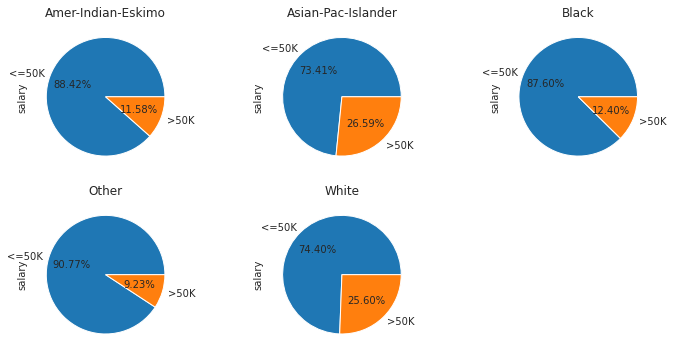

In [143]:
fig, ax = plt.subplots(2, 3, figsize = (12, 6))

ax[0,0].pie(x = amer_sal, 
            labels=["<=50K", ">50K"],
            autopct= "%.2f%%")
ax[0,0].set_title("Amer-Indian-Eskimo")
ax[0,0].set_ylabel("salary")

ax[0,1].pie(x = asian_sal, 
            labels=["<=50K", ">50K"],
            autopct= "%.2f%%")
ax[0,1].set_title("Asian-Pac-Islander")
ax[0,1].set_ylabel("salary")

ax[0,2].pie(x = black_sal, 
            labels=["<=50K", ">50K"],
            autopct= "%.2f%%")
ax[0,2].set_title("Black")
ax[0,2].set_ylabel("salary")

ax[1,0].pie(x = other_sal, 
            labels=["<=50K", ">50K"],
            autopct= "%.2f%%")
ax[1,0].set_title("Other")
ax[1,0].set_ylabel("salary")

ax[1,1].pie(x = white_sal, 
            labels=["<=50K", ">50K"],
            autopct= "%.2f%%")
ax[1,1].set_title("White")
ax[1,1].set_ylabel("salary")

ax[1,2].axis("off");

**Check the count of person in each races by "salary" levels and visualize it with countplot**

In [144]:
df.groupby("salary")["race"].value_counts()

salary  race              
<=50K   White                 20680
        Black                  2735
        Asian-Pac-Islander      762
        Amer-Indian-Eskimo      275
        Other                   246
>50K    White                  7115
        Black                   387
        Asian-Pac-Islander      276
        Amer-Indian-Eskimo       36
        Other                    25
Name: race, dtype: int64

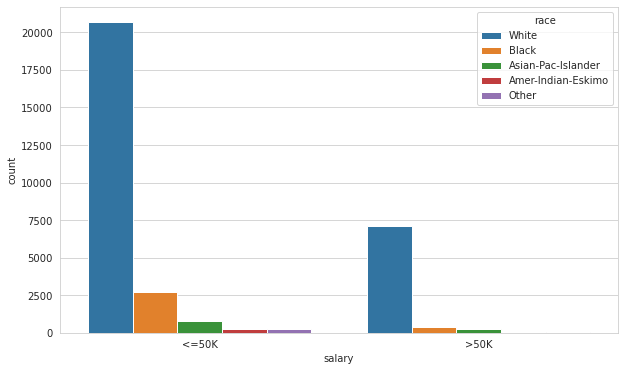

In [145]:
sns.countplot(data = df, x = "salary", hue = "race");

**Check the the percentage distribution of person in each races by "salary" levels and visualize it with bar plot**

In [146]:
df.groupby("salary")["race"].value_counts() / df.groupby("salary")["race"].count()

salary  race              
<=50K   White                0.837
        Black                0.111
        Asian-Pac-Islander   0.031
        Amer-Indian-Eskimo   0.011
        Other                0.010
>50K    White                0.908
        Black                0.049
        Asian-Pac-Islander   0.035
        Amer-Indian-Eskimo   0.005
        Other                0.003
Name: race, dtype: float64

In [147]:
race_per = df.groupby("salary")["race"].value_counts() / df.groupby("salary")["race"].count()

tab_race = pd.DataFrame(race_per)

tab_race.rename(columns = {"race": "percentage"}, inplace = True)

tab_race.reset_index(level = [0,1], inplace = True)

tab_race

,salary,race,percentage
0,<=50K,White,0.837
1,<=50K,Black,0.111
2,<=50K,Asian-Pac-Islander,0.031
3,<=50K,Amer-Indian-Eskimo,0.011
4,<=50K,Other,0.010
5,>50K,White,0.908
6,>50K,Black,0.049
7,>50K,Asian-Pac-Islander,0.035
8,>50K,Amer-Indian-Eskimo,0.005
9,>50K,Other,0.003


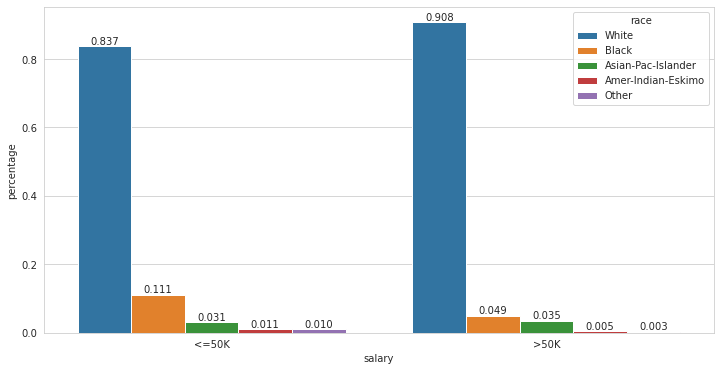

In [148]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(data = tab_race, x = "salary", y = "percentage", hue = "race")

for i in ax.containers:
    ax.bar_label(i,fmt="%.3f");

**Result :** "White" races have a high ratio in the self group about high-level income. "White" race has a high ratio in the low-income group. %25 of whites and Asians are  high level income.

## gender

**Check the count of person in each gender and visualize it with countplot**

In [149]:
df.sex.value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

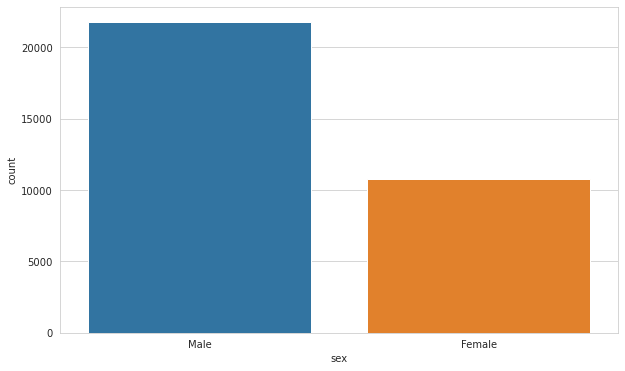

In [150]:
sns.countplot(data = df, x = "sex");

**Check the count of person in each "salary" levels by gender and visualize it with countplot**

In [151]:
df.groupby("sex")["salary"].value_counts()

sex     salary
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: salary, dtype: int64

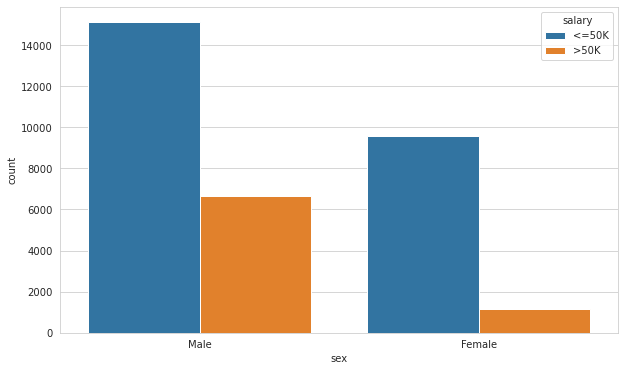

In [152]:
sns.countplot(data = df, x = "sex", hue = "salary");

**Check the percentage distribution of person in each "salary" levels by each gender and visualize it with pie plot**

In [153]:
df.groupby("sex")["salary"].value_counts() / df.groupby("sex")["salary"].count()

sex     salary
Female  <=50K    0.890
        >50K     0.110
Male    <=50K    0.694
        >50K     0.306
Name: salary, dtype: float64

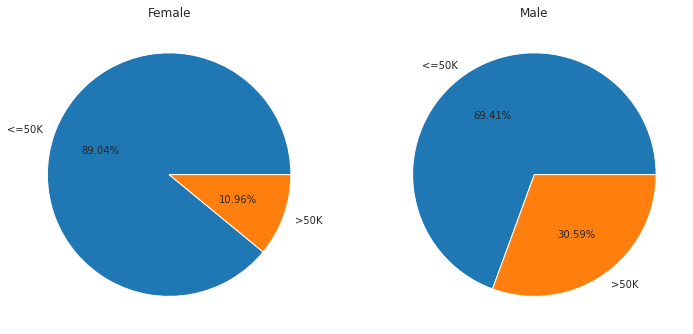

In [154]:
fem_sal = (df.groupby("sex")["salary"].value_counts() * 100 / df.groupby("sex")["salary"].count())[:2]

ma_sal = (df.groupby("sex")["salary"].value_counts() * 100 / df.groupby("sex")["salary"].count())[2:4]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.pie(x = fem_sal, labels = ["<=50K", ">50K"], autopct = ("%.2f%%"))
ax1.set_ylabel = ("salary")
ax1.set_title("Female")

ax2.pie(x = ma_sal, labels = ["<=50K", ">50K"], autopct = ("%.2f%%"))
ax2.set_ylabel = ("salary")
ax2.set_title("Male");

**Check the count of person in each gender by "salary" levels and visualize it with countplot**

In [155]:
df.groupby("salary")["sex"].value_counts()

salary  sex   
<=50K   Male      15115
        Female     9583
>50K    Male       6660
        Female     1179
Name: sex, dtype: int64

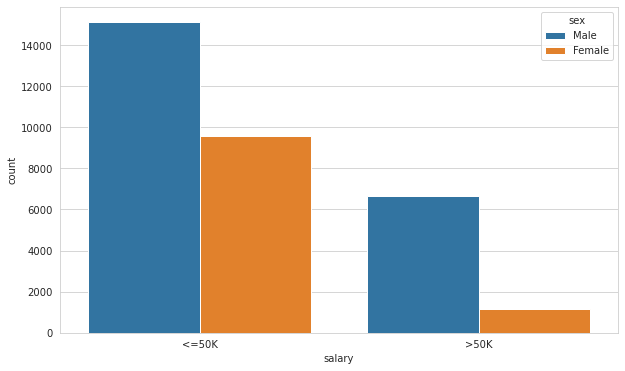

In [156]:
sns.countplot(data = df, x = "salary", hue = "sex");

**Check the the percentage distribution of person in each gender by "salary" levels and visualize it with pie plot**

In [157]:
df.groupby("salary")["sex"].value_counts() / df.groupby("salary")["sex"].count()

salary  sex   
<=50K   Male     0.612
        Female   0.388
>50K    Male     0.850
        Female   0.150
Name: sex, dtype: float64

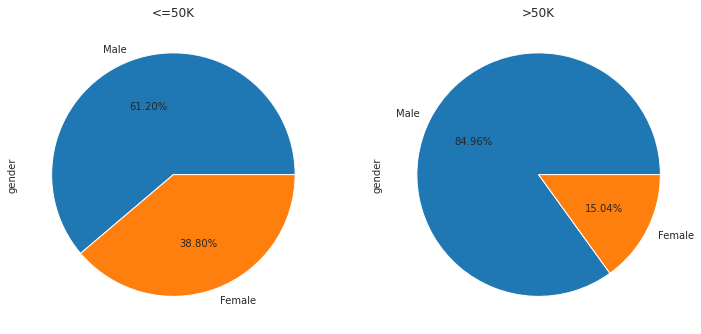

In [158]:
less_50 = (df.groupby("salary")["sex"].value_counts() * 100 / df.groupby("salary")["sex"].count())[:2]
more_50 = (df.groupby("salary")["sex"].value_counts() * 100 / df.groupby("salary")["sex"].count())[2:4]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.pie(x = less_50, labels = ["Male", "Female"],  autopct = ("%.2f%%"))
ax1.set_ylabel("gender")
ax1.set_title("<=50K")

ax2.pie(x = more_50, labels = ["Male", "Female"], autopct = ("%.2f%%"))
ax2.set_ylabel("gender")
ax2.set_title(">50K");

**Result :** We can easily say that males have earned more income than females. 30% of male and 11% of female have a higher income level when compared within themselves.

## native_country

**Check the count of person in each categories and visualize it with countplot**

In [159]:
df.native_country.value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

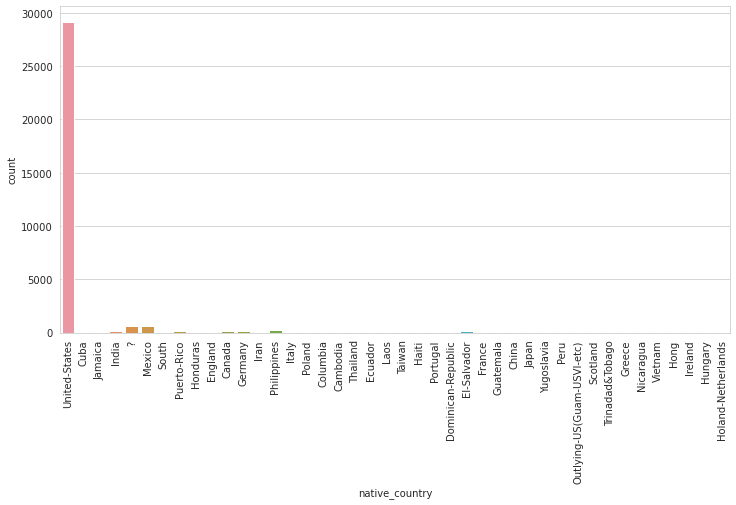

In [160]:
fig, ax = plt.subplots(figsize = (12,6))

sns.countplot(data = df, x = "native_country")

ax.set_xticklabels(df.native_country.unique(), rotation = 90);

**Replace the value "?" to the value "Unknown"** 

In [161]:
# Replace "?" values with "Unknown"

df["native_country"].replace("?", "Unknown", inplace = True)

**Decrease the number of categories in "native_country" feature as US, and Others and create a new feature with this new categorical data**

In [162]:
def mapping_native_country(x):
    if x == "United-States":
        return "US"
    else:
        return "Others"

In [163]:
df.native_country.apply(mapping_native_country).value_counts()

US        29153
Others     3384
Name: native_country, dtype: int64

In [164]:
# By using "mapping_native_country" def function above, create a new column named "native_country_summary"

df["native_country_summary"] = df.native_country.apply(mapping_native_country)

df.native_country_summary

0            US
1            US
2            US
3            US
4        Others
          ...  
32556        US
32557        US
32558        US
32559        US
32560        US
Name: native_country_summary, Length: 32537, dtype: object

**Visualize the count of person in each new categories (US, Others)**

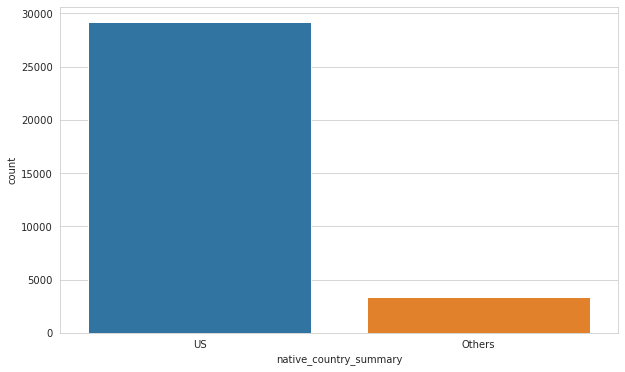

In [165]:
sns.countplot(data = df, x = "native_country_summary");

**Check the count of person in each "salary" levels by these new native countries (US, Others) and visualize it with countplot**

In [166]:
df.groupby("native_country_summary")["salary"].value_counts()

native_country_summary  salary
Others                  <=50K      2714
                        >50K        670
US                      <=50K     21984
                        >50K       7169
Name: salary, dtype: int64

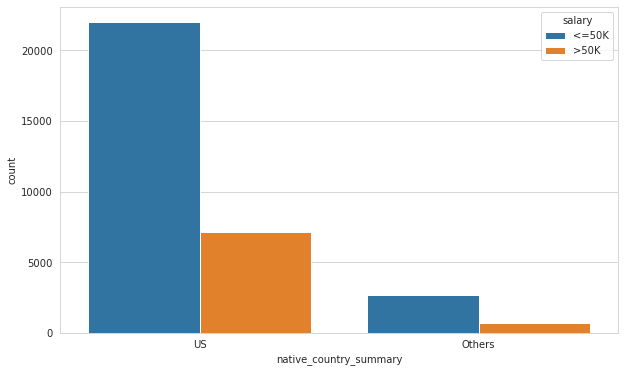

In [167]:
sns.countplot(data = df, x = "native_country_summary", hue = "salary");

**Check the percentage distribution of person in each "salary" levels by each new native countries (US, Others) and visualize it with pie plot separately**

In [168]:
df.groupby("native_country_summary")["salary"].value_counts() / df.groupby("native_country_summary")["salary"].count()

native_country_summary  salary
Others                  <=50K    0.802
                        >50K     0.198
US                      <=50K    0.754
                        >50K     0.246
Name: salary, dtype: float64

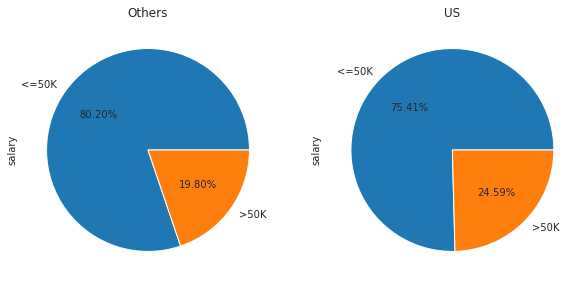

In [169]:
per_other = (df.groupby("native_country_summary")["salary"].value_counts() * 100 / df.groupby("native_country_summary")["salary"].count())[:2]
per_US = (df.groupby("native_country_summary")["salary"].value_counts() * 100 / df.groupby("native_country_summary")["salary"].count())[2:4]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.pie(x = per_other, labels = ["<=50K", ">50K"], autopct = ("%.2f%%"))
ax1.set_ylabel("salary")
ax1.set_title("Others")

ax2.pie(x = per_US, labels = ["<=50K", ">50K"], autopct = ("%.2f%%"))
ax2.set_ylabel("salary")
ax2.set_title("US");

**Check the count of person in each these new native countries (US, Others) by "salary" levels and visualize it with countplot**

In [170]:
df.groupby("salary")["native_country_summary"].value_counts()

salary  native_country_summary
<=50K   US                        21984
        Others                     2714
>50K    US                         7169
        Others                      670
Name: native_country_summary, dtype: int64

**Check the the percentage distribution of person in each these new native countries (US, Others) by "salary" levels and visualize it with pie plot separately**

In [171]:
df.groupby("salary")["native_country_summary"].value_counts() / df.groupby("salary")["native_country_summary"].count()

salary  native_country_summary
<=50K   US                       0.890
        Others                   0.110
>50K    US                       0.915
        Others                   0.085
Name: native_country_summary, dtype: float64

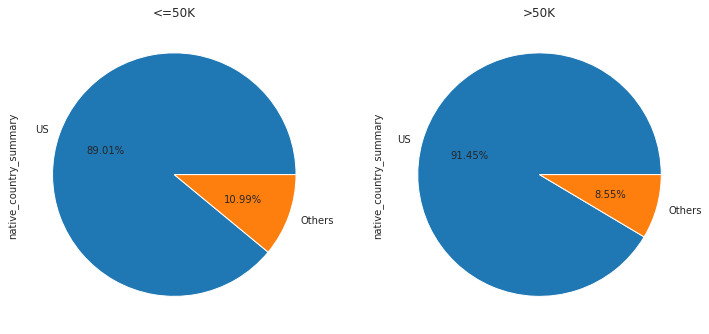

In [172]:
sal_less50 = (df.groupby("salary")["native_country_summary"].value_counts() * 100 / df.groupby("salary")["native_country_summary"].count())[:2]
sal_more50 = (df.groupby("salary")["native_country_summary"].value_counts() * 100 / df.groupby("salary")["native_country_summary"].count())[2:4]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.pie(x = sal_less50, labels = ["US", "Others"],  autopct = ("%.2f%%"))
ax1.set_ylabel("native_country_summary")
ax1.set_title("<=50K")

ax2.pie(x = sal_more50, labels = ["US", "Others"], autopct = ("%.2f%%"))
ax2.set_ylabel("native_country_summary")
ax2.set_title(">50K");

**Result :** "United States" has a high ratio of high-level income both in the self group and in the high-income group. Also, United States has a high ratio of low-level income. When we compare  United States and Others according  to salary that  we see there is no difference between them.

## <p style="background-color:#47B699; font-family:newtimeroman; color:white; font-size:175%; text-align:center; border-radius:10px 10px;">Other Specific Analysis Questions</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47B699" data-toggle="popover">Content</a>

### 1. What is the average age of males and females by income level?

In [173]:
df.groupby(["salary", "sex"])["age"].mean()

salary  sex   
<=50K   Female   36.217
        Male     37.149
>50K    Female   42.126
        Male     44.627
Name: age, dtype: float64

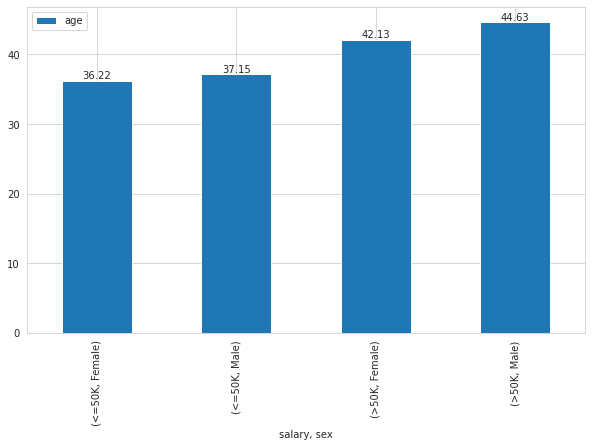

In [174]:
ax = pd.DataFrame(df.groupby(["salary", "sex"])["age"].mean()).plot(kind = "bar", xlabel = "salary, sex")

ax.bar_label(ax.containers[0], fmt = "%.2f");

In [175]:
tab1 = df.groupby(["salary", "sex"])["age"].mean()

sal_gen_age = pd.DataFrame(tab1)

sal_gen_age.reset_index(level = [0, 1], inplace = True)

sal_gen_age

,salary,sex,age
0,<=50K,Female,36.217
1,<=50K,Male,37.149
2,>50K,Female,42.126
3,>50K,Male,44.627


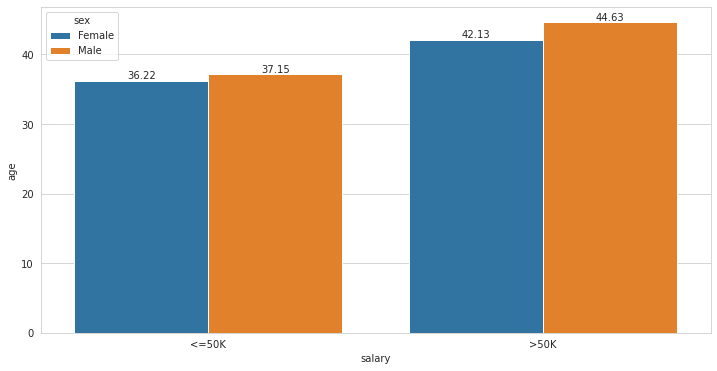

In [176]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(data = sal_gen_age, x = "salary", y = "age", hue = "sex")

for i in ax.containers:
    ax.bar_label(i, fmt = ("%.2f"));

### 2. What is the workclass percentages of Americans in high-level income group?

In [177]:
df.loc[(df.native_country == "United-States") & (df.salary == ">50K")]

high_income = df.loc[(df.native_country == "United-States") & (df.salary == ">50K")]

high_income.workclass.value_counts() * 100 / high_income.workclass.count()

Private            63.314
Self-emp-not-inc    9.192
Local-gov           8.021
Self-emp-inc        7.784
Federal-gov         4.687
State-gov           4.547
Unknown             2.455
Name: workclass, dtype: float64

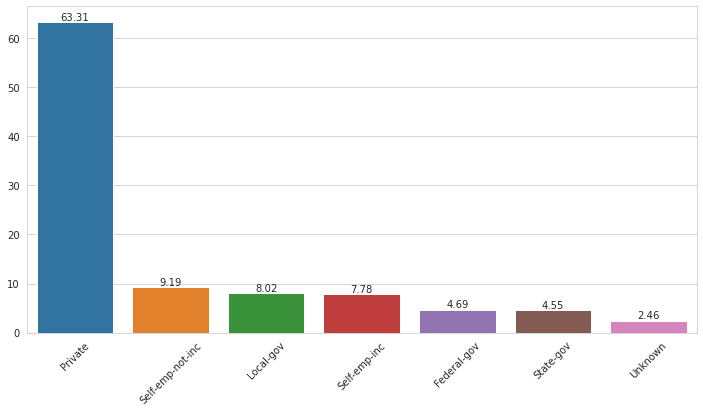

In [178]:
graph1 = high_income.workclass.value_counts() * 100 / high_income.workclass.count()

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x = graph1.index, y = graph1.values)

ax.set_xticklabels(graph1.index, rotation = 45)

for i in ax.containers:
    ax.bar_label(i, fmt = "%.2f");

### 3. What is the occupation percentages of Americans who work as "Private" workclass in high-level income group?

In [179]:
private1 = df.loc[(df.native_country == "United-States") & (df.salary== ">50K") & (df.workclass == "Private")]

private1.occupation.value_counts() * 100 / private1.occupation.count()

Exec-managerial     26.438
Prof-specialty      19.476
Craft-repair        14.695
Sales               14.475
Adm-clerical         6.389
Transport-moving     5.442
Tech-support         4.428
Machine-op-inspct    4.428
Other-service        1.674
Handlers-cleaners    1.344
Farming-fishing      0.595
Protective-serv      0.595
Priv-house-serv      0.022
Name: occupation, dtype: float64

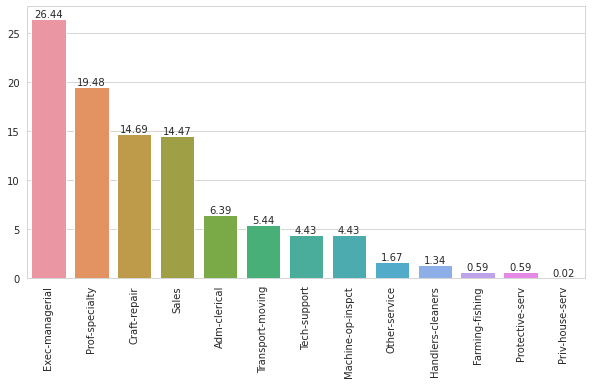

In [180]:
per_private1 = private1.occupation.value_counts() * 100 / private1.occupation.count()

fig, ax = plt.subplots(figsize = (10, 5))

sns.barplot(x = per_private1.index, y = per_private1.values)

ax.set_xticklabels(per_private1.index, rotation = 90)

for i in ax.containers:
    ax.bar_label(i, fmt = "%.2f");

### 4. What is the education level percentages of Asian-Pac-Islander race group in high-level income group?

In [181]:
edu_asian = df.loc[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander")]

edu_asian.education.value_counts() * 100 / edu_asian.education.count()

Bachelors      35.145
Masters        15.580
HS-grad        12.319
Some-college   11.957
Prof-school     9.783
Doctorate       6.522
Assoc-voc       3.261
Assoc-acdm      2.899
5th-6th         1.087
9th             0.362
11th            0.362
10th            0.362
12th            0.362
Name: education, dtype: float64

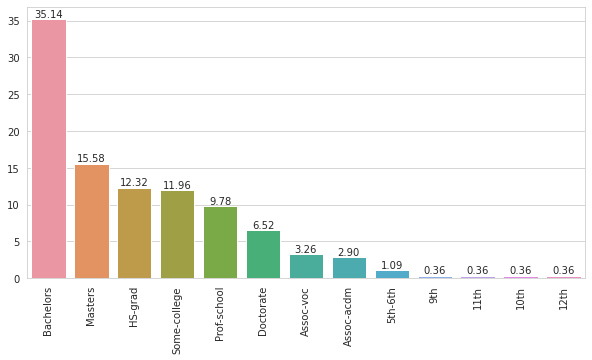

In [182]:
graph2 = edu_asian.education.value_counts() * 100 / edu_asian.education.count()

fig, ax = plt.subplots(figsize = (10, 5))

sns.barplot(x = graph2.index, y = graph2.values)

ax.set_xticklabels(graph2.index, rotation = 90)

for i in ax.containers:
    ax.bar_label(i, fmt = "%.2f");

### 5. What is the occupation percentages of Asian-Pac-Islander race group who has a Bachelors degree in high-level income group?

In [183]:
bach_asian = df.loc[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander") & (df.education == "Bachelors")]

bach_asian.occupation.value_counts() * 100 / bach_asian.occupation.count()

Exec-managerial     27.835
Prof-specialty      25.773
Adm-clerical        12.371
Sales                9.278
Other-service        9.278
Craft-repair         7.216
Tech-support         3.093
Protective-serv      2.062
Transport-moving     1.031
Machine-op-inspct    1.031
Farming-fishing      1.031
Name: occupation, dtype: float64

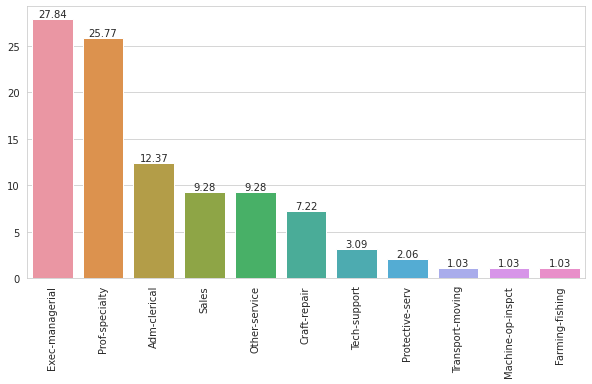

In [184]:
graph3 = bach_asian.occupation.value_counts() * 100 / bach_asian.occupation.count()

fig, ax = plt.subplots(figsize = (10, 5))

sns.barplot(x = graph3.index, y = graph3.values)

ax.set_xticklabels(graph3.index, rotation = 90)

for i in ax.containers:
    ax.bar_label(i, fmt = "%.2f");

### 6. What is the mean of working hours per week by gender for education level, workclass and marital status? Try to plot all required in one figure.

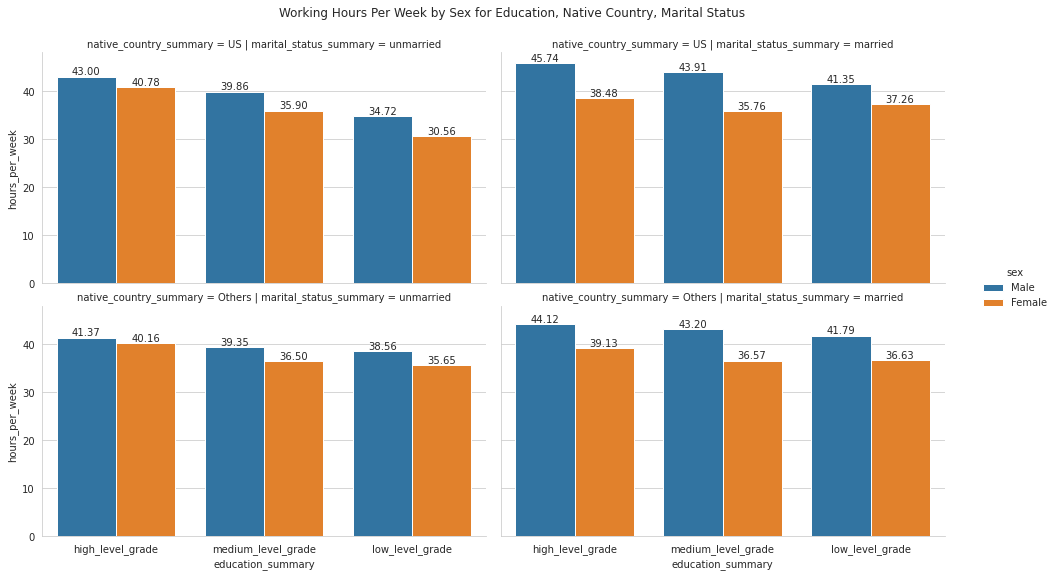

In [185]:
g = sns.catplot(x="education_summary",
            y="hours_per_week",
            data=df,
            kind="bar",
            hue="sex",
            ci= None,
            col="marital_status_summary",
            row="native_country_summary",
            
               );

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Working Hours Per Week by Sex for Education, Native Country, Marital Status ')

ax1 = g.facet_axis(0,0)
ax2 = g.facet_axis(0,1)
ax3 = g.facet_axis(1,0)
ax4 = g.facet_axis(1,1)


for i in ax1.containers:
         ax1.bar_label(i,fmt="%.2f")
for i in ax2.containers:
         ax2.bar_label(i,fmt="%.2f")
for i in ax3.containers:
         ax3.bar_label(i,fmt="%.2f")        
for i in ax4.containers:
         ax4.bar_label(i,fmt="%.2f")

## <p style="background-color:#47B699; font-family:newtimeroman; color:white; font-size:175%; text-align:center; border-radius:10px 10px;">Dropping Similar & Unneccessary Features</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47B699" data-toggle="popover">Content</a>

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_num           32537 non-null  object
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  hours_per_week          32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  object
 15  ed

In [187]:
# Drop the columns of "education", "education_num", "relationship", "marital_status", "native_country" permanently

df.drop(columns = ["education", "education_num", "relationship", "marital_status", "native_country"], inplace = True)

## <p style="background-color:#47B699; font-family:newtimeroman; color:white; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Missing Value</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47B699" data-toggle="popover">Content</a>

**Check the missing values for all features basically**

In [188]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
sex                       0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

**1. It seems that there is no missing value. But we know that "workclass", and "occupation" features have missing values as the "Unknown" string values. Examine these features in more detail.**

**2. Decide if drop these "Unknown" string values or not**

In [189]:
df.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [190]:
df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [191]:
df[(df["workclass"] == "Unknown") | (df.workclass == "Never-worked")]["workclass"].value_counts()

Unknown         1836
Never-worked       7
Name: workclass, dtype: int64

In [192]:
# Replace "Unknown" values with NaN using numpy library
df.replace("Unknown", np.nan, inplace = True)

In [193]:
df.isna().sum()

age                          0
workclass                 1836
fnlwgt                       0
occupation                1843
race                         0
sex                          0
capital_gain                 0
capital_loss                 0
hours_per_week               0
salary                       0
education_summary            0
marital_status_summary       0
native_country_summary       0
dtype: int64

In [194]:
# Drop missing values in df permanently
df.dropna(inplace = True)

In [195]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
sex                       0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30694 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30694 non-null  int64 
 1   workclass               30694 non-null  object
 2   fnlwgt                  30694 non-null  int64 
 3   occupation              30694 non-null  object
 4   race                    30694 non-null  object
 5   sex                     30694 non-null  object
 6   capital_gain            30694 non-null  int64 
 7   capital_loss            30694 non-null  int64 
 8   hours_per_week          30694 non-null  int64 
 9   salary                  30694 non-null  object
 10  education_summary       30694 non-null  object
 11  marital_status_summary  30694 non-null  object
 12  native_country_summary  30694 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.3+ MB


## <p style="background-color:#47B699; font-family:newtimeroman; color:white; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47B699" data-toggle="popover">Content</a>

### Boxplot and Histplot for all numeric features

**Plot boxplots for each numeric features at the same figure as subplots**

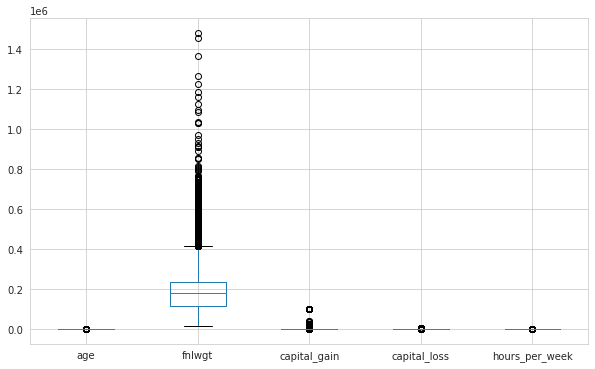

In [197]:
df.boxplot();

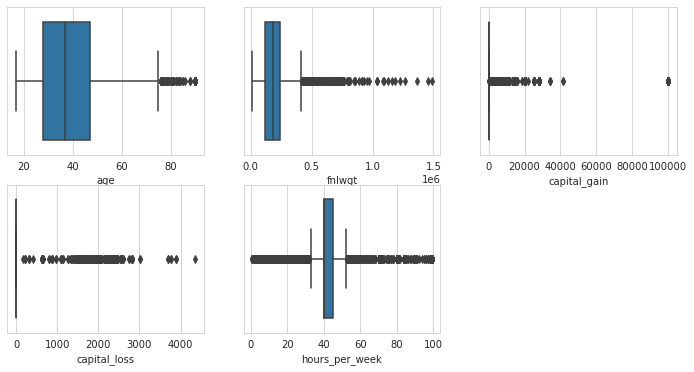

In [198]:
fig, ax = plt.subplots(2, 3, figsize = (12, 6))

sns.boxplot(data = df, x = "age", ax = ax[0,0])
sns.boxplot(data = df, x = "fnlwgt", ax = ax[0,1])
sns.boxplot(data = df, x = "capital_gain", ax = ax[0,2])
sns.boxplot(data = df, x = "capital_loss", ax = ax[1,0])
sns.boxplot(data = df, x = "hours_per_week", ax = ax[1,1])

ax[1,2].axis("off");

**Plot both boxplots and histograms for each numeric features at the same figure as subplots**

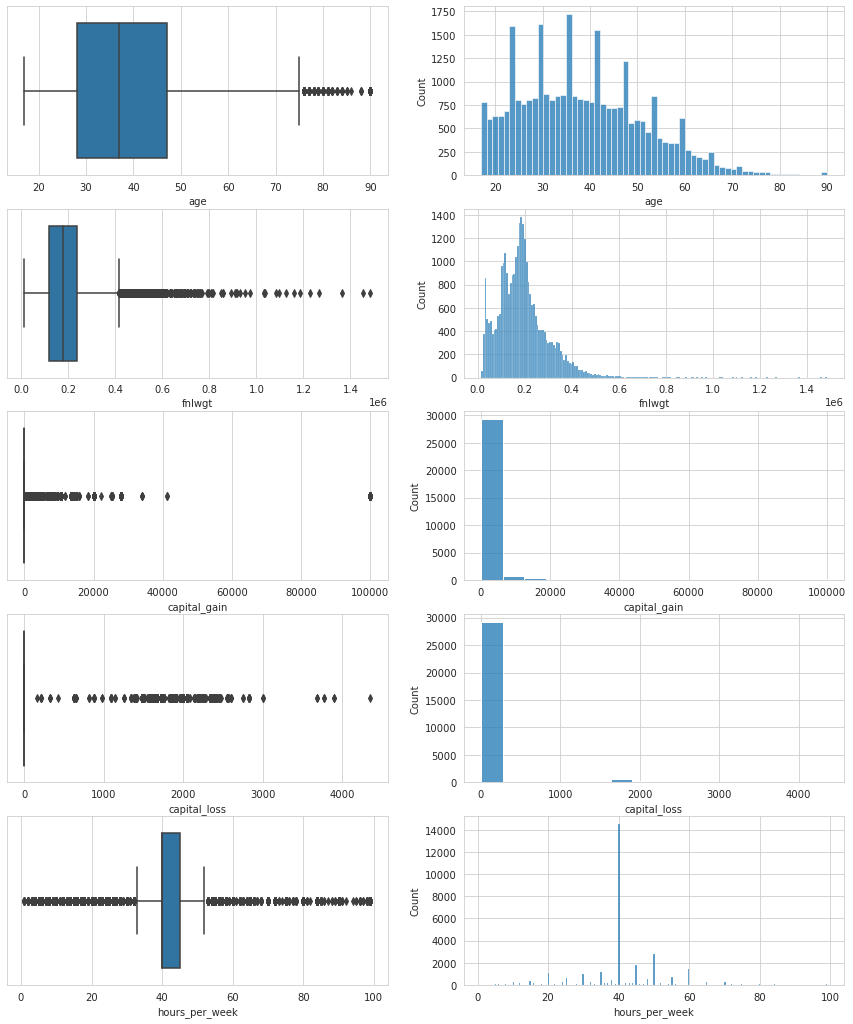

In [199]:
fig, ax = plt.subplots(5, 2, figsize = (15, 18))

sns.boxplot(data = df, x = "age", ax = ax[0,0])
sns.boxplot(data = df, x = "fnlwgt", ax = ax[1,0])
sns.boxplot(data = df, x = "capital_gain", ax = ax[2,0])
sns.boxplot(data = df, x = "capital_loss", ax = ax[3,0])
sns.boxplot(data = df, x = "hours_per_week", ax = ax[4,0])

sns.histplot(data = df, x = "age", ax = ax[0,1])
sns.histplot(data = df, x = "fnlwgt", ax = ax[1,1])
sns.histplot(data = df, x = "capital_gain", ax = ax[2,1])
sns.histplot(data = df, x = "capital_loss", ax = ax[3,1])
sns.histplot(data = df, x = "hours_per_week", ax = ax[4,1]);

**Check the statistical values for all numeric features**

In [200]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30694.000,38.448,13.115,17.000,28.000,37.000,47.000,90.000
fnlwgt,30694.000,189848.229,105465.126,13769.000,117828.500,178513.500,237293.750,1484705.000
capital_gain,30694.000,1106.902,7500.730,0.000,0.000,0.000,0.000,99999.000
capital_loss,30694.000,88.980,405.808,0.000,0.000,0.000,0.000,4356.000
hours_per_week,30694.000,40.953,11.984,1.000,40.000,40.000,45.000,99.000


**1. After analyzing all features, we have decided that we can't evaluate extreme values in "fnlwgt, capital_gain, capital_loss" features in the scope of outliers.**

**2. So let's examine "age and hours_per_week" features and detect extreme values which could be outliers by using IQR Rule.**

### age

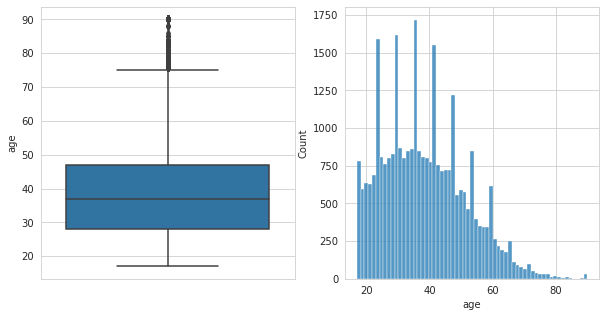

In [201]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.boxplot(data = df, y = "age", ax = ax[0])
sns.histplot(data = df, x = "age", ax = ax[1]);

In [202]:
# Find IQR defining quantile 0.25 for low level and 0.75 for high level 
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(28.0, 47.0, 19.0)

In [203]:
# Find lower and upper limit using IQR
age_lower_lim = Q1 - 1.5 * IQR
age_upper_lim = Q3 + 1.5 * IQR

age_lower_lim, age_upper_lim

(-0.5, 75.5)

In [204]:
df.age.value_counts().tail(14)

90    35
75    34
76    30
77    20
80    16
79    15
78    14
81    14
84     8
82     7
83     5
88     3
85     3
86     1
Name: age, dtype: int64

In [205]:
# Define the observations whose age is greater than upper limit and sort these observations by age in descending order
df[(df.age > 75)].sort_values(by = ["age"], ascending = False)

,age,workclass,fnlwgt,occupation,race,sex,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
8806,90,Private,87372,Prof-specialty,White,Male,20051,0,72,>50K,high_level_grade,married,US
14159,90,Local-gov,187749,Adm-clerical,Asian-Pac-Islander,Male,0,0,20,<=50K,medium_level_grade,married,Others
28463,90,Federal-gov,195433,Craft-repair,White,Male,0,0,30,<=50K,medium_level_grade,married,US
12975,90,Private,250832,Exec-managerial,White,Male,0,0,40,<=50K,low_level_grade,married,US
11996,90,Private,40388,Exec-managerial,White,Male,0,0,55,<=50K,high_level_grade,unmarried,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15102,76,Local-gov,169133,Adm-clerical,White,Female,0,0,30,<=50K,medium_level_grade,unmarried,US
19085,76,Private,125784,Exec-managerial,White,Male,0,0,40,<=50K,high_level_grade,married,US
23515,76,Private,142535,Adm-clerical,White,Male,0,0,6,<=50K,medium_level_grade,unmarried,US
8240,76,Self-emp-not-inc,225964,Sales,White,Male,0,0,8,<=50K,medium_level_grade,unmarried,US


### hours_per_week

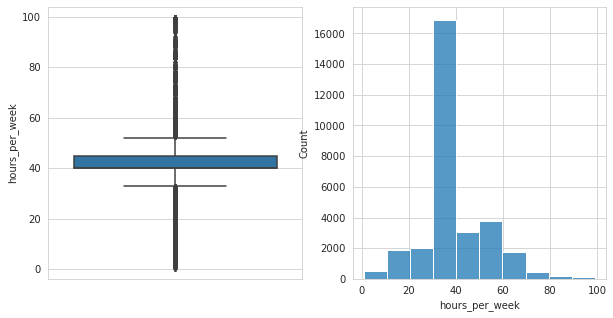

In [206]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.boxplot(data = df, y = "hours_per_week", ax = ax[0])
sns.histplot(data = df, x = "hours_per_week", ax = ax[1], bins = 10);

In [207]:
# Find IQR defining quantile 0.25 for low level and 0.75 for high level 

Q1 = df.hours_per_week.quantile(0.25)
Q3 = df.hours_per_week.quantile(0.75)

IQR = Q3 - Q1

Q1, Q3, IQR

(40.0, 45.0, 5.0)

In [208]:
# Find the lower and upper limit using IQR
hours_per_week_lower_lim = Q1 - 1.5 * IQR
hours_per_week_upper_lim = Q3 + 1.5 * IQR

hours_per_week_lower_lim, hours_per_week_upper_lim

(32.5, 52.5)

In [209]:
(df[(df.hours_per_week > 52.5)].hours_per_week.value_counts()).sort_index(ascending=False)

99      80
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      28
89       2
88       2
87       1
86       2
85      13
84      41
82       1
81       3
80     124
78       8
77       6
76       3
75      63
74       1
73       2
72      68
70     284
68      12
67       4
66      17
65     242
64      14
63      10
62      18
61       2
60    1441
59       5
58      27
57      17
56      91
55     683
54      39
53      23
Name: hours_per_week, dtype: int64

In [210]:
# Define the observations where  hours per week are greater than upper limit and 
# sort these observations by hours per week in descending order
df[df.hours_per_week > 52.5].sort_values(by = ["hours_per_week"], ascending = False)

,age,workclass,fnlwgt,occupation,race,sex,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
25986,44,Local-gov,212665,Protective-serv,Black,Male,0,0,99,<=50K,medium_level_grade,married,US
19529,38,Private,66326,Transport-moving,White,Male,0,0,99,<=50K,medium_level_grade,married,US
8796,39,Private,70995,Transport-moving,White,Male,15024,0,99,>50K,high_level_grade,married,US
15534,29,Private,167716,Other-service,White,Female,0,0,99,<=50K,medium_level_grade,unmarried,US
22313,26,Self-emp-not-inc,258306,Farming-fishing,White,Male,0,0,99,<=50K,low_level_grade,married,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,27,Private,138705,Craft-repair,White,Male,0,0,53,<=50K,medium_level_grade,married,US
23244,58,Private,248739,Farming-fishing,White,Male,0,0,53,>50K,medium_level_grade,married,US
28858,62,Private,123411,Transport-moving,White,Male,0,0,53,<=50K,low_level_grade,married,US
18417,24,Private,117167,Other-service,White,Female,0,0,53,<=50K,medium_level_grade,unmarried,US


In [211]:
(df[df.hours_per_week < 32.5].hours_per_week.value_counts()).sort_index(ascending = True)

1        8
2       15
3       24
4       28
5       39
6       40
7       20
8      103
9       17
10     223
11       9
12     143
13      19
14      28
15     350
16     182
17      27
18      64
19      14
20    1066
21      23
22      39
23      20
24     220
25     582
26      30
27      28
28      74
29       6
30    1009
31       5
32     239
Name: hours_per_week, dtype: int64

In [212]:
df.loc[(df.hours_per_week < 32.5)].groupby("salary")["hours_per_week"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,4372.000,21.548,7.343,1.000,16.000,20.000,30.000,32.000
>50K,322.000,22.028,7.813,1.000,18.000,24.000,30.000,32.000


In [213]:
df.loc[(df.hours_per_week < 32.5) ].groupby("salary")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,4372.000,34.052,17.730,17.000,20.000,26.000,45.000,90.000
>50K,322.000,49.484,13.894,22.000,39.000,48.000,60.000,90.000


**Result :** As we see, there are number of extreme values in both "age and hours_per_week" features. But how can we know if these extreme values are outliers or not? At this point, **domain knowledge** comes to the fore.

**Domain Knowledge for this dataset:**
1. In this dataset, all values are created according to the statements of individuals. So It can be some "data entries errors".
2. In addition, we have aimed to create an ML model with some restrictions as getting better performance from the ML model.
3. In this respect, our sample space ranges for some features are as follows.
    - **age : 17 to 80**
    - **hours_per_week : 7 to 70**
    - **if somebody's age is more than 60, he/she can't work more than 60 hours in a week**

### Dropping rows according to the domain knownledge 

In [214]:
# Create a condition according to your domain knowledge on age stated above and 
# sort the observations meeting this condition by age in ascending order

df[(df.age > 80) | (df.age < 17)].sort_values(by = ["age"], ascending = False) 

,age,workclass,fnlwgt,occupation,race,sex,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
222,90,Private,51744,Other-service,Black,Male,0,2206,40,<=50K,medium_level_grade,unmarried,US
18832,90,Private,115306,Exec-managerial,White,Female,0,0,40,<=50K,high_level_grade,unmarried,US
10545,90,Private,175491,Craft-repair,White,Male,9386,0,50,>50K,medium_level_grade,married,Others
11512,90,Private,87285,Other-service,White,Female,0,0,24,<=50K,medium_level_grade,unmarried,US
11996,90,Private,40388,Exec-managerial,White,Male,0,0,55,<=50K,high_level_grade,unmarried,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,81,State-gov,132204,Other-service,White,Female,0,0,20,<=50K,low_level_grade,unmarried,US
6748,81,Private,122651,Sales,White,Male,0,0,15,<=50K,medium_level_grade,married,US
2906,81,Private,114670,Priv-house-serv,Black,Female,2062,0,5,<=50K,low_level_grade,unmarried,US
21501,81,Private,177408,Exec-managerial,White,Male,0,2377,26,>50K,medium_level_grade,married,US


In [215]:
# Find the shape of the dataframe created by the condition defined above for age 
df[(df.age > 80) | (df.age < 17)].sort_values(by = ["age"], ascending = False).shape

(76, 13)

In [216]:
# Assign the indices of the rows defined in accordance with condition above for age
age_17to80 = df[(df.age > 80) | (df.age < 17)].sort_values(by = ["age"], ascending = False)

age_17to80.index

Int64Index([  222, 18832, 10545, 11512, 11996, 12975, 14159, 15892, 18277,
            18413, 18725, 19212,  8973, 19489, 19747, 20610, 22220, 24043,
            28463, 31030, 32277, 32367, 10210, 15356,  5370,  4070,  1040,
             6232,  1935,  2303,  5272,  6624,  2891,  5406,  8806,  1168,
            22895, 21835, 24027, 20463,  8381, 32459, 26731, 27795,  9471,
             6214, 14711, 11238,  7720, 15662,  7481, 24395, 23459, 19172,
            16302, 14756,  8431, 20421, 22481, 31855, 13696, 24280,  4834,
            29594, 28948, 12830,   918, 13295, 24560,  3537, 13928, 19045,
             6748,  2906, 21501, 19495],
           dtype='int64')

In [217]:
# Drop these indices defined above for age
df.drop(age_17to80.index, inplace = True)

In [218]:
# Create a condition according to your domain knowledge on hours per week stated above and 
# sort the observations meeting this condition by hours per week in descending order
df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].sort_values(by = ["hours_per_week"], ascending = False)

,age,workclass,fnlwgt,occupation,race,sex,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
22216,45,Private,54260,Craft-repair,White,Male,0,0,99,<=50K,medium_level_grade,unmarried,US
5432,44,Private,83508,Prof-specialty,White,Female,2354,0,99,<=50K,high_level_grade,unmarried,US
19053,27,Private,40295,Transport-moving,White,Male,0,0,99,<=50K,medium_level_grade,unmarried,US
19141,59,Private,106748,Other-service,White,Female,0,0,99,<=50K,low_level_grade,married,US
19399,39,Self-emp-inc,163057,Craft-repair,White,Male,0,0,99,<=50K,medium_level_grade,unmarried,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20909,77,Self-emp-not-inc,71676,Adm-clerical,White,Female,0,1944,1,<=50K,medium_level_grade,unmarried,US
25078,74,Private,260669,Other-service,White,Female,0,0,1,<=50K,low_level_grade,unmarried,US
19750,23,Private,72887,Craft-repair,Asian-Pac-Islander,Male,0,0,1,<=50K,medium_level_grade,unmarried,Others
189,58,State-gov,109567,Prof-specialty,White,Male,0,0,1,>50K,high_level_grade,married,US


In [219]:
# Find the shape of the dataframe created by the condition defined above for hours per week 
hours_per_week_7to70 = df[(df.hours_per_week < 7) | (df.hours_per_week > 70)]

hours_per_week_7to70.shape

(621, 13)

In [220]:
# Assign the indices of the rows defined in accordance with condition above for hours per week

hours_per_week_7to70.index

Int64Index([   10,    28,   157,   189,   265,   272,   299,   387,   427,
              476,
            ...
            32271, 32320, 32332, 32359, 32364, 32391, 32402, 32432, 32469,
            32476],
           dtype='int64', length=621)

In [221]:
# Drop these indices defined above for hours per week

df.drop(hours_per_week_7to70.index, inplace = True)

In [222]:
# Create a condition according to your domain knowledge on both age and hours per week stated above 

domain_for_60 = df[(df.age > 60) & (df.hours_per_week > 60)]

domain_for_60

,age,workclass,fnlwgt,occupation,race,sex,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
1541,62,Private,162245,Prof-specialty,White,Male,0,1628,70,<=50K,high_level_grade,married,US
2154,75,Private,101887,Priv-house-serv,White,Female,0,0,70,<=50K,low_level_grade,unmarried,US
2184,63,Self-emp-inc,54052,Sales,White,Male,0,0,68,>50K,high_level_grade,married,US
2665,70,Private,94692,Sales,White,Male,0,0,70,>50K,high_level_grade,married,US
3101,65,Self-emp-inc,81413,Farming-fishing,White,Male,0,2352,65,<=50K,medium_level_grade,married,US
5417,67,Private,197816,Sales,White,Male,0,1844,70,<=50K,medium_level_grade,married,US
6826,68,Private,284763,Transport-moving,White,Male,0,0,70,<=50K,low_level_grade,unmarried,US
8066,61,Self-emp-not-inc,133969,Sales,Asian-Pac-Islander,Male,0,0,63,<=50K,medium_level_grade,married,Others
9646,62,Self-emp-not-inc,26911,Other-service,White,Female,0,0,66,<=50K,low_level_grade,unmarried,US
12624,63,Self-emp-inc,110890,Prof-specialty,White,Male,0,0,70,>50K,high_level_grade,unmarried,US


In [223]:
# Find the shape of the dataframe created by the condition defined above for both age and hours per week
domain_for_60.shape

(23, 13)

In [224]:
# Assign the indices of the rows defined in accordance with condition above for both age and hours per week
domain_for_60.index

Int64Index([ 1541,  2154,  2184,  2665,  3101,  5417,  6826,  8066,  9646,
            12624, 16634, 18367, 19584, 20125, 23399, 23585, 24903, 25910,
            26625, 27721, 28294, 31342, 32192],
           dtype='int64')

In [225]:
# Drop these indices defined above for both age and hours per week
df.drop(domain_for_60.index, inplace = True)

In [226]:
# What is new shape of dataframe now
df.shape

(29974, 13)

In [227]:
# Reset the indices and take the head of DataFrame now
df.head()

,age,workclass,fnlwgt,occupation,race,sex,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
0,39,State-gov,77516,Adm-clerical,White,Male,2174,0,40,<=50K,high_level_grade,unmarried,US
1,50,Self-emp-not-inc,83311,Exec-managerial,White,Male,0,0,13,<=50K,high_level_grade,married,US
2,38,Private,215646,Handlers-cleaners,White,Male,0,0,40,<=50K,medium_level_grade,unmarried,US
3,53,Private,234721,Handlers-cleaners,Black,Male,0,0,40,<=50K,low_level_grade,married,US
4,28,Private,338409,Prof-specialty,Black,Female,0,0,40,<=50K,high_level_grade,married,Others


## <p style="background-color:#47B699; font-family:newtimeroman; color:white; font-size:175%; text-align:center; border-radius:10px 10px;">Final Step to Make the Dataset Ready for ML Models</p>

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white; background-color:#47B699" data-toggle="popover">Content</a>

### 1. Convert all features to numeric

**Convert target feature (salary) to numeric (0 and 1) by using map function**

In [228]:
df.salary = df.salary.map({"<=50K": 0,">50K": 1})
df.salary

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 29974, dtype: int64

In [229]:
df.salary.value_counts()

0    22524
1     7450
Name: salary, dtype: int64

**Convert all features to numeric by using get_dummies function**

In [230]:
pd.get_dummies(df,drop_first=True)

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,salary,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,education_summary_low_level_grade,education_summary_medium_level_grade,marital_status_summary_unmarried,native_country_summary_US
0,39,77516,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1
1,50,83311,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,38,215646,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
3,53,234721,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
4,28,338409,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
32557,40,154374,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
32558,58,151910,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
32559,22,201490,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1


In [231]:
# What's the shape of dataframe
df.shape

(29974, 13)

In [232]:
# What's the shape of dataframe created by dummy operation
pd.get_dummies(df,drop_first=True).shape

(29974, 34)

### 2. Take a look at correlation between features by utilizing power of visualizing

In [233]:
df_corr = pd.get_dummies(df,drop_first=True).corr()
df_corr

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,salary,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,education_summary_low_level_grade,education_summary_medium_level_grade,marital_status_summary_unmarried,native_country_summary_US
age,1.000,-0.074,0.082,0.059,0.119,0.253,0.070,-0.211,0.111,0.146,0.020,0.016,-0.011,0.022,0.111,0.035,-0.104,-0.012,-0.094,0.011,0.065,0.006,-0.033,-0.017,0.034,-0.010,-0.015,-0.032,0.028,0.083,-0.010,-0.079,-0.318,0.013
fnlwgt,-0.074,1.000,-0.002,-0.011,-0.019,-0.010,-0.004,0.045,-0.025,-0.037,-0.012,-0.003,0.004,0.009,-0.020,-0.031,0.030,0.013,-0.003,0.008,-0.019,0.016,0.003,0.004,0.002,-0.049,0.118,0.006,-0.059,0.028,0.042,-0.010,0.026,-0.077
capital_gain,0.082,-0.002,1.000,-0.032,0.086,0.222,-0.010,-0.045,0.093,0.033,-0.013,-0.002,-0.003,-0.023,0.061,-0.012,-0.024,-0.027,-0.042,-0.007,0.086,-0.008,0.008,-0.010,-0.019,0.010,-0.020,-0.001,0.014,0.047,-0.041,-0.084,-0.084,0.006
capital_loss,0.059,-0.011,-0.032,1.000,0.060,0.152,0.015,-0.039,0.031,0.023,-0.002,-0.005,0.005,0.000,0.048,-0.013,-0.023,-0.018,-0.043,-0.011,0.046,-0.002,0.007,0.004,-0.004,0.004,-0.024,-0.008,0.024,0.048,-0.033,-0.052,-0.081,0.010
hours_per_week,0.119,-0.019,0.086,0.060,1.000,0.247,0.004,-0.081,0.124,0.066,-0.038,-0.016,0.000,0.059,0.153,0.051,-0.057,0.004,-0.205,-0.055,0.054,0.017,0.001,-0.025,0.063,-0.005,-0.064,-0.008,0.059,0.239,-0.134,-0.049,-0.234,0.008
salary,0.253,-0.010,0.222,0.152,0.247,1.000,0.029,-0.121,0.138,0.030,0.011,-0.012,-0.006,-0.021,0.215,-0.054,-0.094,-0.077,-0.166,-0.038,0.185,0.026,0.015,0.023,-0.029,0.012,-0.091,-0.032,0.086,0.216,-0.162,-0.183,-0.438,0.035
workclass_Local-gov,0.070,-0.004,-0.010,0.015,0.004,0.029,1.000,-0.461,-0.052,-0.079,-0.057,-0.006,-0.005,-0.052,-0.025,-0.025,-0.029,-0.066,-0.013,-0.018,0.162,0.230,-0.097,-0.020,0.005,-0.020,0.041,-0.010,-0.028,-0.044,-0.042,-0.064,-0.010,0.034
workclass_Private,-0.211,0.045,-0.045,-0.039,-0.081,-0.121,-0.461,1.000,-0.324,-0.497,-0.358,-0.037,-0.029,0.034,-0.068,-0.103,0.092,0.130,0.072,0.040,-0.167,-0.150,0.058,0.020,0.028,-0.003,0.003,0.025,-0.003,-0.062,0.087,0.080,0.122,-0.046
workclass_Self-emp-inc,0.111,-0.025,0.093,0.031,0.124,0.138,-0.052,-0.324,1.000,-0.056,-0.040,-0.004,-0.003,-0.019,0.126,0.016,-0.040,-0.041,-0.052,-0.013,0.004,-0.023,0.085,-0.031,-0.024,0.008,-0.050,-0.011,0.044,0.082,-0.037,-0.039,-0.108,-0.003
workclass_Self-emp-not-inc,0.146,-0.037,0.033,0.023,0.066,0.030,-0.079,-0.497,-0.056,1.000,-0.062,-0.006,-0.005,0.073,0.021,0.208,-0.055,-0.060,-0.037,-0.020,0.016,-0.038,0.031,-0.034,-0.007,-0.004,-0.057,-0.014,0.053,0.106,-0.004,-0.016,-0.112,0.014


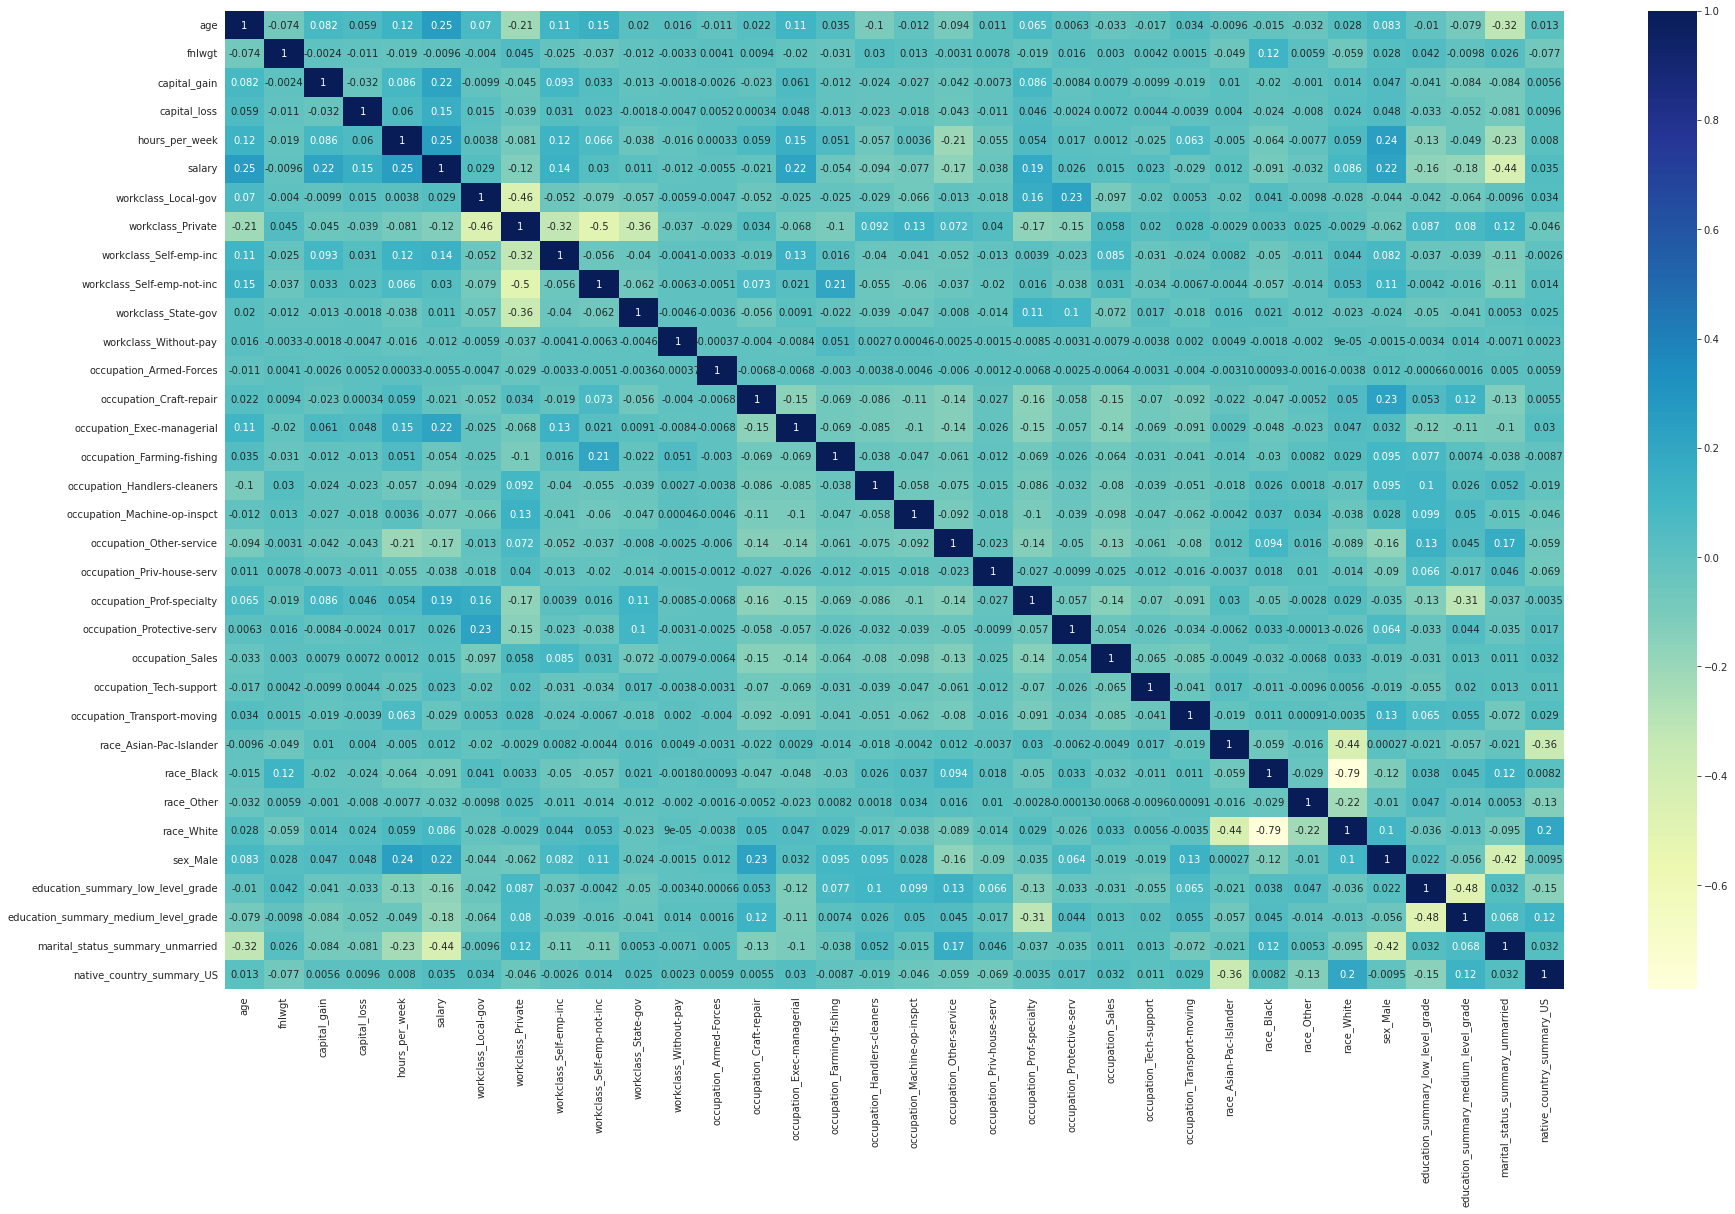

In [234]:
fig, ax = plt.subplots(figsize = (30, 18)) 

sns.heatmap(data = df_corr, annot = True, cmap="YlGnBu");

In [235]:
df_corr_salary = df_corr[["salary"]].sort_values(by = ["salary"],ascending = False)[1:]
df_corr_salary

,salary
age,0.253
hours_per_week,0.247
capital_gain,0.222
sex_Male,0.216
occupation_Exec-managerial,0.215
occupation_Prof-specialty,0.185
capital_loss,0.152
workclass_Self-emp-inc,0.138
race_White,0.086
native_country_summary_US,0.035


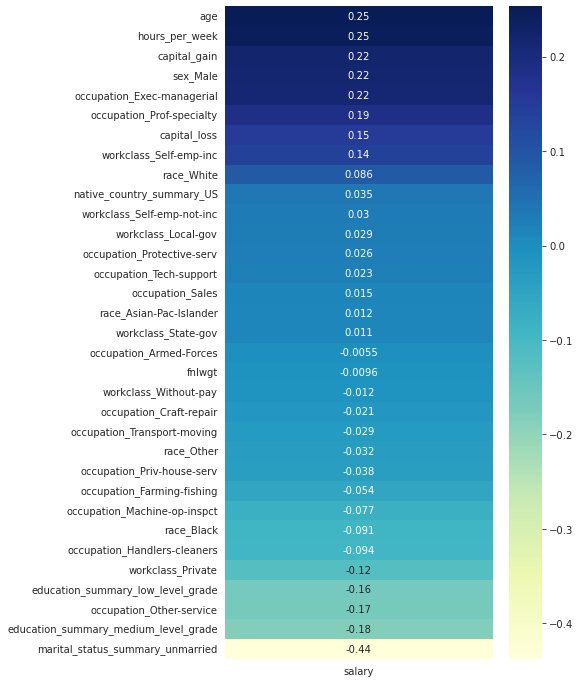

In [236]:
fig, ax = plt.subplots(figsize = (6, 12)) 

sns.heatmap(data = df_corr_salary, annot = True, cmap="YlGnBu");

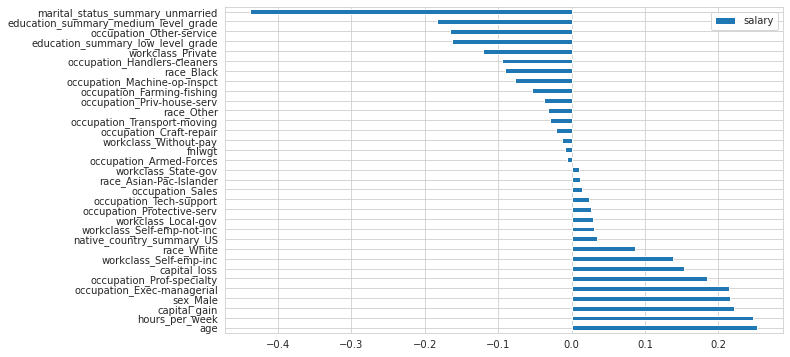

In [237]:
df_corr_salary.plot.barh();

## <p style="background-color:#47B699; font-family:newtimeroman; color:white; font-size:150%; text-align:center; border-radius:10px 10px;">SUMMARY</p>
*   %75.9 of people work for <=50K, %24.1 of people work for >50K
*   Age of the high-income group is higher than the low-income group. It means the older generation possesses more wealth than the young.
*   There is no significant difference between high and low-income groups according to the "fnlwgt" feature
*   The "capital-gain" feature has not provided very meaningful insights. Nevertheless, we can say that the more "capital-gain", the more "high-income".
*   There is no significant difference between high and low-income groups according to the "capital_loss" feature.
*   In a high-income group, average working time is 45 hours  per week. On the other hand, in a low-income group, average working time is 39 hours per week.
*  We can easily say that the more education the more high income.
*  Married persons have earned more income than unmarried persons.
*   "Private" work-class has a high ratio in the self group about high-level income. "Private" work-class has a high ratio in the low-income group.
*   "Exec-managerial" and "Prof-specialty" occupations have a high ratio ( ~ %50) of high-level income both in the self group and in the high-income group.
*   %25 of whites and Asians are  high level income.
*   Males have earned more income than females.
*   When we compare  United States and Others according  to salary that  we see there is no difference between them.

## <p style="background-color:#47B699; font-family:newtimeroman; color:white; font-size:150%; text-align:center; border-radius:10px 10px;">RESULTS</p>

*   On income; we can say that education, marriage, profession, age scale and weekly working hours are directly effective.
*   For example; if you are a highly educated 45-year-old married man, we can say that you probably have a high income in US.